<a href="https://colab.research.google.com/github/brunopdrocha/AP1_Projeto_MachineLearning/blob/main/AP1_PROJ_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA


- Bruno Pilão

- Mateus Norcia

Vamos realizar uma predição em R com o objetivo de avaliar se determinados jovens possuem ou não uma depressão

ID: Identificador único para cada estudante.

Age: Idade do estudante.

Gender: Gênero (por exemplo, Masculino, Feminino).

City: Região geográfica onde o estudante reside.

CGPA: Média de notas ou pontuação acadêmica do estudante.

Sleep Duration: Duração média diária de sono.

Profession: Profissão.

Work Pressure: Nível de pressão no trabalho.

Academic Pressure: Nível de pressão acadêmica.

Study Satisfaction: Grau de satisfação com os estudos.

Job Satisfaction: Grau de satisfação com o emprego.

Dietary Habits: Hábitos alimentares

Variavel Alvo : **Depresion**

In [ ]:
# Instalando Dependências para projeto
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("PerformanceAnalytics")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Vizualização Inicial do nosso dataset

In [ ]:
# Vamos armazenar nosso dataset
df <- read.csv("https://raw.githubusercontent.com/brunopdrocha/AP1_Projeto_MachineLearning/refs/heads/main/Student%20Depression%20Dataset.csv")

In [ ]:
# vamos ler nosso data set

head(df)

,id,Gender,Age,City,Profession,Academic.Pressure,Work.Pressure,CGPA,Study.Satisfaction,Job.Satisfaction,Sleep.Duration,Dietary.Habits,Degree,Have.you.ever.had.suicidal.thoughts..,Work.Study.Hours,Financial.Stress,Family.History.of.Mental.Illness,Depression
,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
2,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2,Yes,0
3,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1,Yes,0
4,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5,Yes,1
5,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1,No,0
6,33,Male,29,Pune,Student,2,0,5.70,3,0,Less than 5 hours,Healthy,PhD,No,4,1,No,0


In [ ]:
# Vamos contar a quantidade de itens do nosso dataset
nrow(df)

[1] 27901

In [ ]:
# Vamos realizar uma distribuição estatistica de nosso dataset
summary(df)

       id            Gender               Age            City          
 Min.   :     2   Length:27901       Min.   :18.00   Length:27901      
 1st Qu.: 35039   Class :character   1st Qu.:21.00   Class :character  
 Median : 70684   Mode  :character   Median :25.00   Mode  :character  
 Mean   : 70442                      Mean   :25.82                     
 3rd Qu.:105818                      3rd Qu.:30.00                     
 Max.   :140699                      Max.   :59.00                     
                                                                       
  Profession        Academic.Pressure Work.Pressure          CGPA       
 Length:27901       Min.   :0.000     Min.   :0.00000   Min.   : 0.000  
 Class :character   1st Qu.:2.000     1st Qu.:0.00000   1st Qu.: 6.290  
 Mode  :character   Median :3.000     Median :0.00000   Median : 7.770  
                    Mean   :3.141     Mean   :0.00043   Mean   : 7.656  
                    3rd Qu.:4.000     3rd Qu.:0.00000   3rd

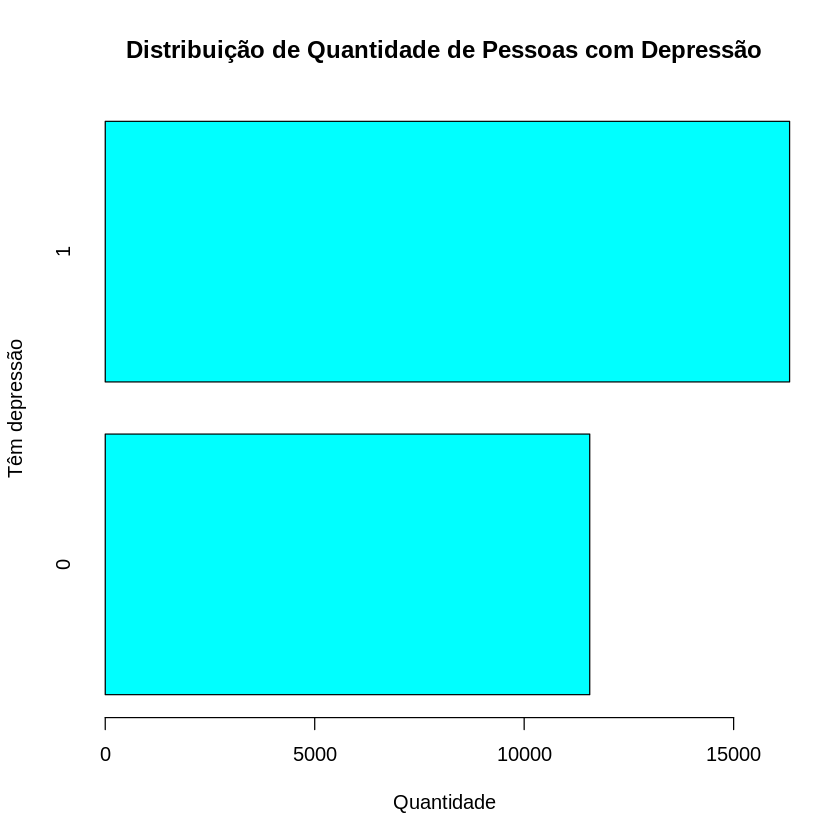

In [ ]:
# Vamos vizualizar em gráfico a nossa variavel alvo no qual devemos realizar uma previsão de dias
# Gráfico de barras básico
barplot(table(df$Depression),
        main = "Distribuição de Quantidade de Pessoas com Depressão",
        xlab = "Quantidade",
        ylab = "Têm depressão",
        col = "cyan",
        hor = TRUE)


In [ ]:
# Vamos avaliar uma distribuição de quantidade de dias que se comprar para ir na estação
table(df$Depression)


    0     1 
11565 16336 

Esta é uma variavel no qual implica se a pessoa possue depressão.

## EDA

In [ ]:
# Verificar se possui itens duplicados no nosso dataset
sum(duplicated(df))

[1] 0

In [ ]:
# Vamos dar uma olhada em quantidade de campos referente a profissão das pessoas
table(df$Profession)


             Architect                   Chef         Civil Engineer 
                     8                      2                      1 
        Content Writer       Digital Marketer                 Doctor 
                     2                      3                      2 
Educational Consultant           Entrepreneur                 Lawyer 
                     1                      1                      1 
               Manager             Pharmacist                Student 
                     1                      2                  27870 
               Teacher         UX/UI Designer 
                     6                      1 

Inicialmente vamos realizar a remoção dos seguintes dados:



1.   ID: Identificador não influencia em uma predição portanto vamos remover desta análise.
2.   City: A cidade é um ponto no qual não impacta em grande ênfase para predição de podendo causar ruído em nosso modelo logo vamos remove-lo
3.  Profession: Maioria dos profissionais ja são estudantes como possui não possui uma grande variedades de profissões vamos remove-lo de nossa predição
4.  Degree : Uma variável categórica onde pode causar grande ruído e não acredito impactar no aluno acredito a média de nota possa influenciar mais para o modelo o que poderia causar um ruido ao nosso modelo


In [ ]:
# Vamos reaçlizar inicialmente remoção de dados que nçao são necessário para nossa predição (Id,City,Profession,Degree)

# Removedo campo ID
df <- subset(df , select = -id )

# Removedo campo City
df <- subset(df , select = -City )

# Removedo campo Profession
df <- subset(df , select = -Profession )


# Removedo campo Degree
df <- subset(df , select = -Degree )


In [ ]:
# Visualizar dataset com estas remoções
head(df)

,Gender,Age,Academic.Pressure,Work.Pressure,CGPA,Study.Satisfaction,Job.Satisfaction,Sleep.Duration,Dietary.Habits,Have.you.ever.had.suicidal.thoughts..,Work.Study.Hours,Financial.Stress,Family.History.of.Mental.Illness,Depression
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,Male,33,5,0,8.97,2,0,5-6 hours,Healthy,Yes,3,1,No,1
2,Female,24,2,0,5.90,5,0,5-6 hours,Moderate,No,3,2,Yes,0
3,Male,31,3,0,7.03,5,0,Less than 5 hours,Healthy,No,9,1,Yes,0
4,Female,28,3,0,5.59,2,0,7-8 hours,Moderate,Yes,4,5,Yes,1
5,Female,25,4,0,8.13,3,0,5-6 hours,Moderate,Yes,1,1,No,0
6,Male,29,2,0,5.70,3,0,Less than 5 hours,Healthy,No,4,1,No,0


In [ ]:
# Vamos mapear o gênero pois para análises futuras necessitamos que seja um número
df$Gender <- ifelse(df$Gender == "Male", 0, 1)
# Alterar o tipo para int
df$Gender <- as.integer(df$Gender)


In [ ]:
# Vamos validar a quantidade de grupos para Sleep.Duration
table(df$Sleep.Duration)


        5-6 hours         7-8 hours Less than 5 hours More than 8 hours 
             6183              7346              8310              6044 
           Others 
               18 

In [ ]:
# Vamos mapear os grupos de horas de sono
library(dplyr)

df <- df %>%
  mutate(Sleep_Group = case_when(
    Sleep.Duration == "Others"              ~ 1,
    Sleep.Duration == "More than 8 hours"    ~ 2,
    Sleep.Duration == "5-6 hours"            ~ 3,
    Sleep.Duration == "7-8 hours"            ~ 4,
    Sleep.Duration == "Less than 5 hours"    ~ 5,
    TRUE                                    ~ NA_real_  # Para capturar casos não mapeados
  ))

# Visualize as primeiras linhas para verificar:
head(df[, c("Sleep.Duration", "Sleep_Group")])
df <- subset(df , select = -Sleep.Duration )



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Sleep.Duration,Sleep_Group
,<chr>,<dbl>
1,5-6 hours,3
2,5-6 hours,3
3,Less than 5 hours,5
4,7-8 hours,4
5,5-6 hours,3
6,Less than 5 hours,5


In [ ]:
table(df$Dietary.Habits)


  Healthy  Moderate    Others Unhealthy 
     7651      9921        12     10317 

In [ ]:
# Vamos mapear os grupos de horas de sono
library(dplyr)

df <- df %>%
  mutate(Dietary.Habits_Group = case_when(
    Dietary.Habits == "Healthy"              ~ 1,
    Dietary.Habits == "Moderate"    ~ 2,
    Dietary.Habits == "Unhealthy"            ~ 3,
    Dietary.Habits == "Others "            ~ 4,
    TRUE                                    ~ NA_real_  # Para capturar casos não mapeados
  ))

# Visualize as primeiras linhas para verificar:
head(df[, c("Dietary.Habits", "Dietary.Habits_Group")])
df <- subset(df , select = -Dietary.Habits )


,Dietary.Habits,Dietary.Habits_Group
,<chr>,<dbl>
1,Healthy,1
2,Moderate,2
3,Healthy,1
4,Moderate,2
5,Moderate,2
6,Healthy,1


In [ ]:
head(df)

,Gender,Age,Academic.Pressure,Work.Pressure,CGPA,Study.Satisfaction,Job.Satisfaction,Have.you.ever.had.suicidal.thoughts..,Work.Study.Hours,Financial.Stress,Family.History.of.Mental.Illness,Depression,Sleep_Group,Dietary.Habits_Group
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,0,33,5,0,8.97,2,0,Yes,3,1,No,1,3,1
2,1,24,2,0,5.90,5,0,No,3,2,Yes,0,3,2
3,0,31,3,0,7.03,5,0,No,9,1,Yes,0,5,1
4,1,28,3,0,5.59,2,0,Yes,4,5,Yes,1,4,2
5,1,25,4,0,8.13,3,0,Yes,1,1,No,0,3,2
6,0,29,2,0,5.70,3,0,No,4,1,No,0,5,1


In [ ]:
# Vamos mapear o item Yes/No para nossa coluna Have.you.ever.had.suicidal.thoughts..
df$Have.you.ever.had.suicidal.thoughts.. <- ifelse(df$Have.you.ever.had.suicidal.thoughts.. == "Yes", 1, 0)
# Alterar o tipo para int
df$Have.you.ever.had.suicidal.thoughts.. <- as.integer(df$Have.you.ever.had.suicidal.thoughts..)

In [ ]:
# Vamos mapear o item Yes/No para nossa coluna Have.you.ever.had.suicidal.thoughts..
df$Family.History.of.Mental.Illness <- ifelse(df$Family.History.of.Mental.Illness == "Yes", 1, 0)
# Alterar o tipo para int
df$df$Family.History.of.Mental.Illness <- as.integer(df$df$Family.History.of.Mental.Illness)

In [ ]:
head(df)

,Gender,Age,Academic.Pressure,Work.Pressure,CGPA,Study.Satisfaction,Job.Satisfaction,Have.you.ever.had.suicidal.thoughts..,Work.Study.Hours,Financial.Stress,Family.History.of.Mental.Illness,Depression,Sleep_Group,Dietary.Habits_Group,df
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<named list>
1,0,33,5,0,8.97,2,0,1,3,1,0,1,3,1,
2,1,24,2,0,5.90,5,0,0,3,2,1,0,3,2,
3,0,31,3,0,7.03,5,0,0,9,1,1,0,5,1,
4,1,28,3,0,5.59,2,0,1,4,5,1,1,4,2,
5,1,25,4,0,8.13,3,0,1,1,1,0,0,3,2,
6,0,29,2,0,5.70,3,0,0,4,1,0,0,5,1,



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


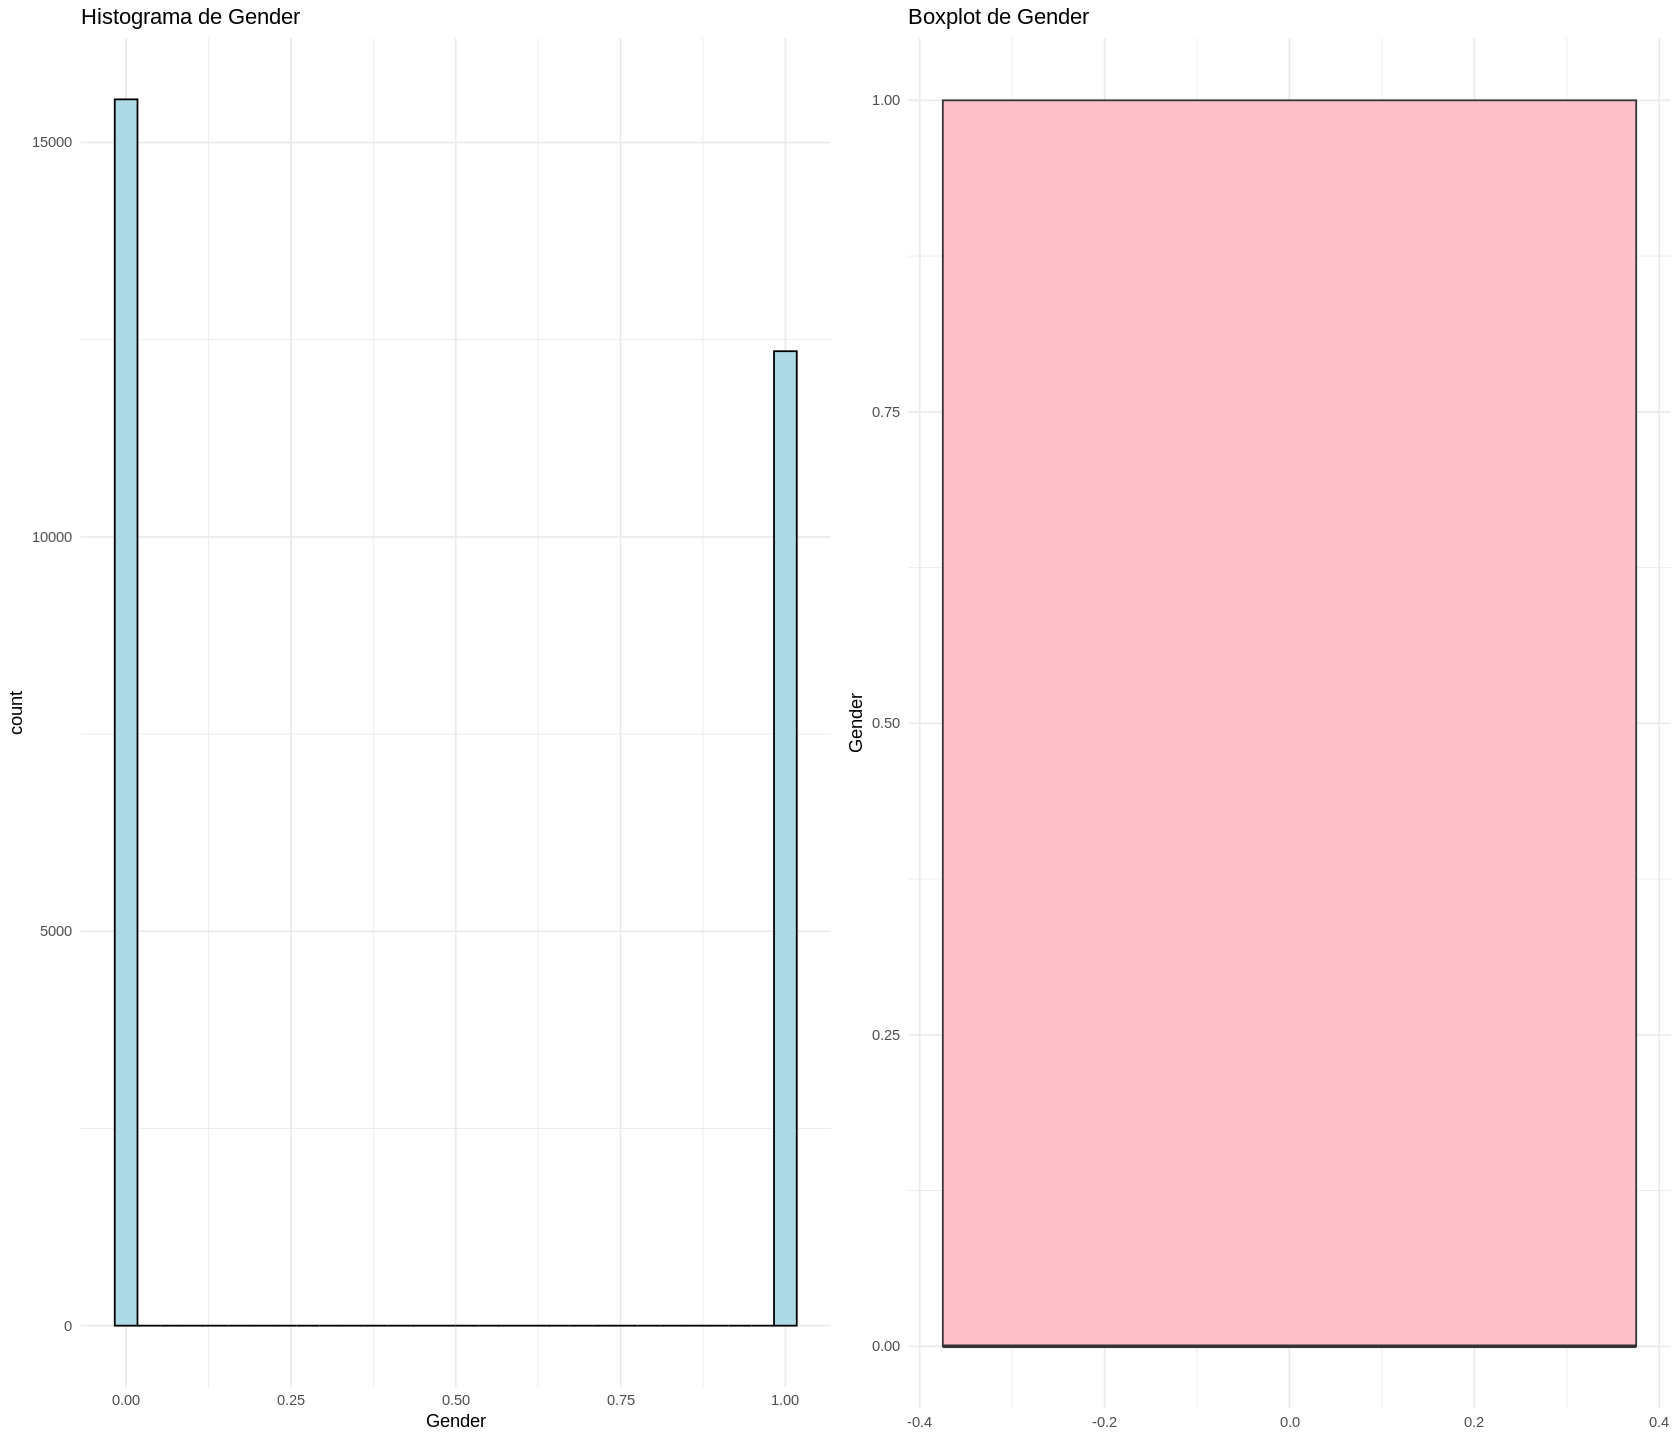

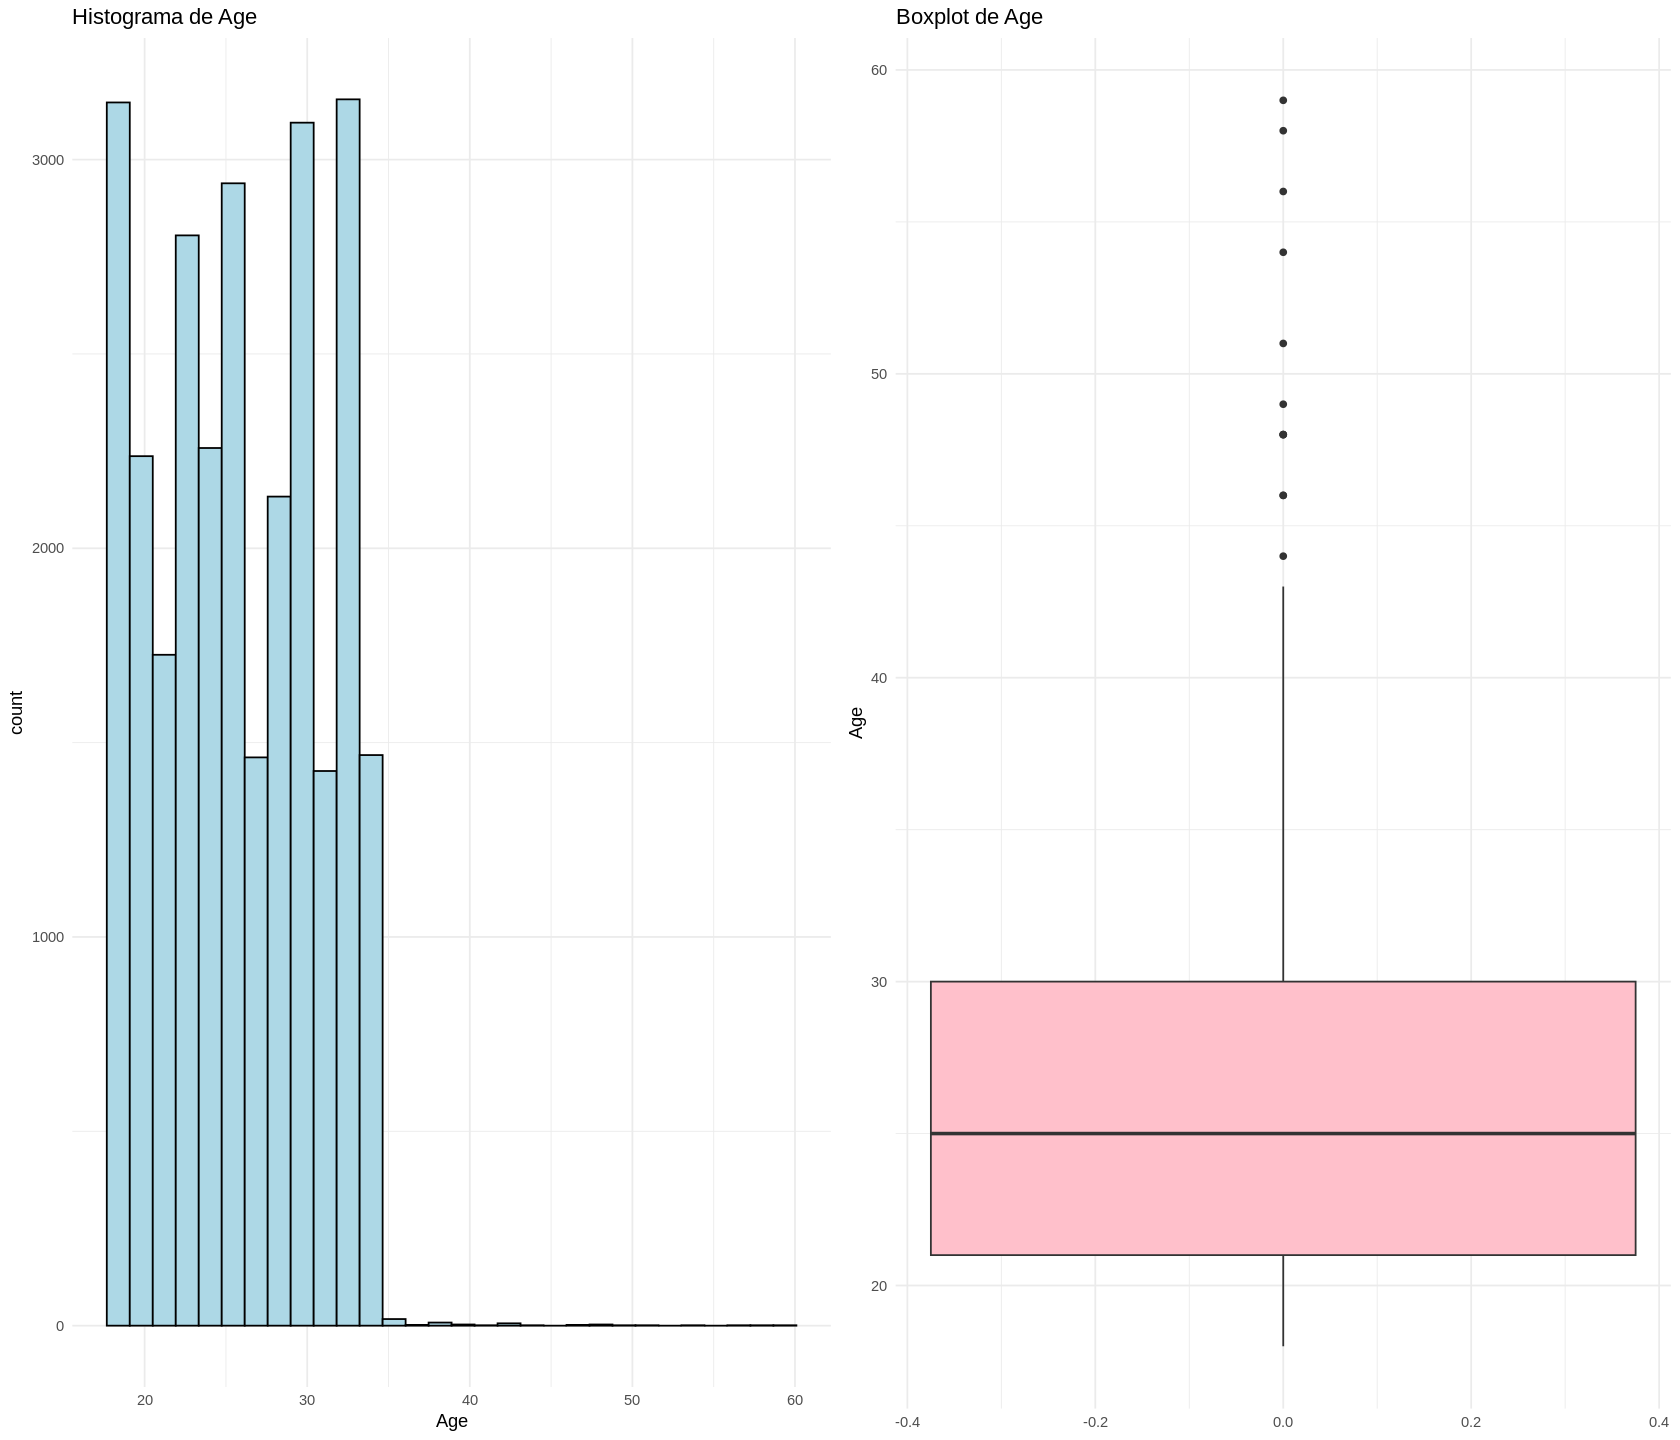

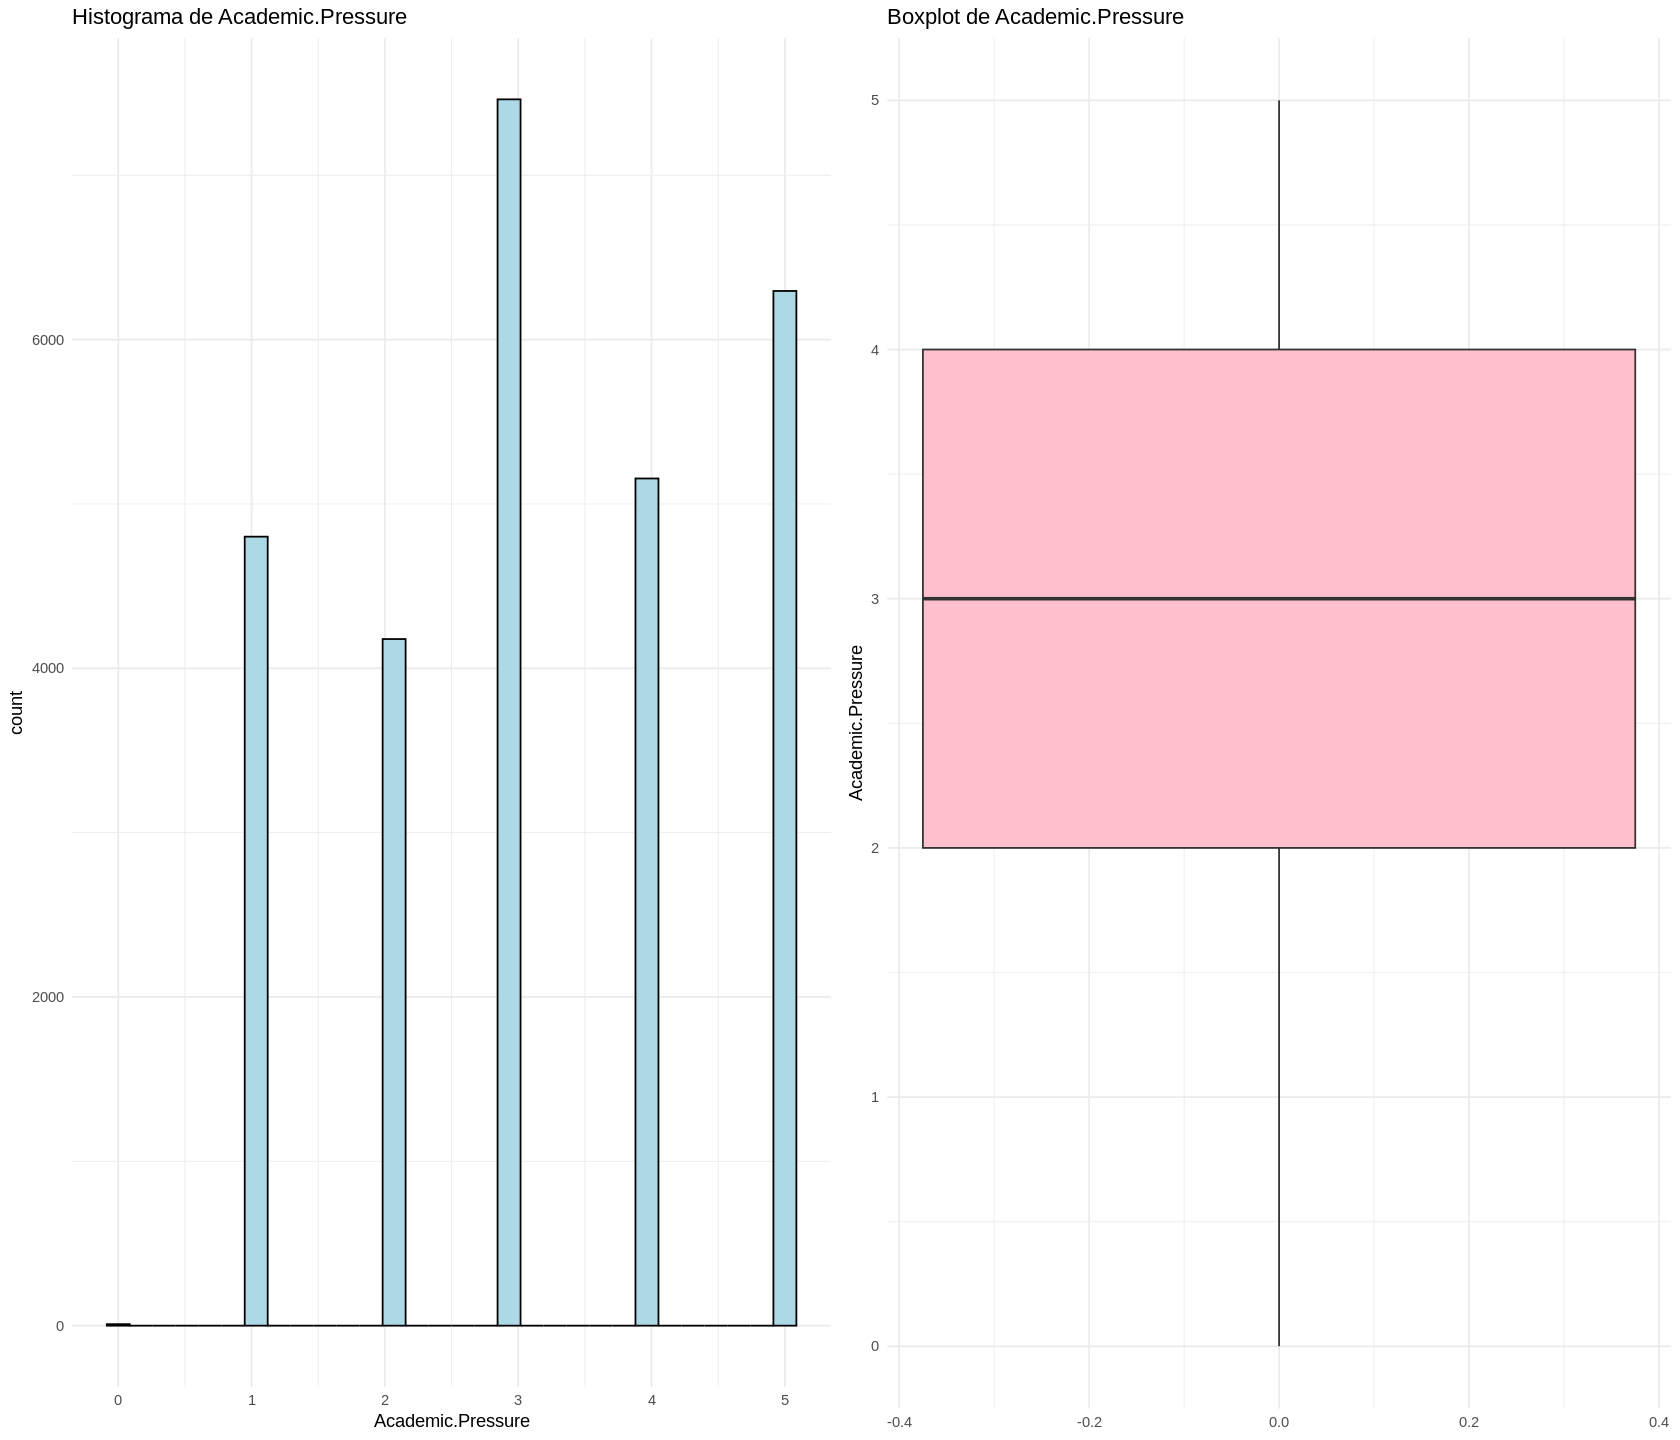

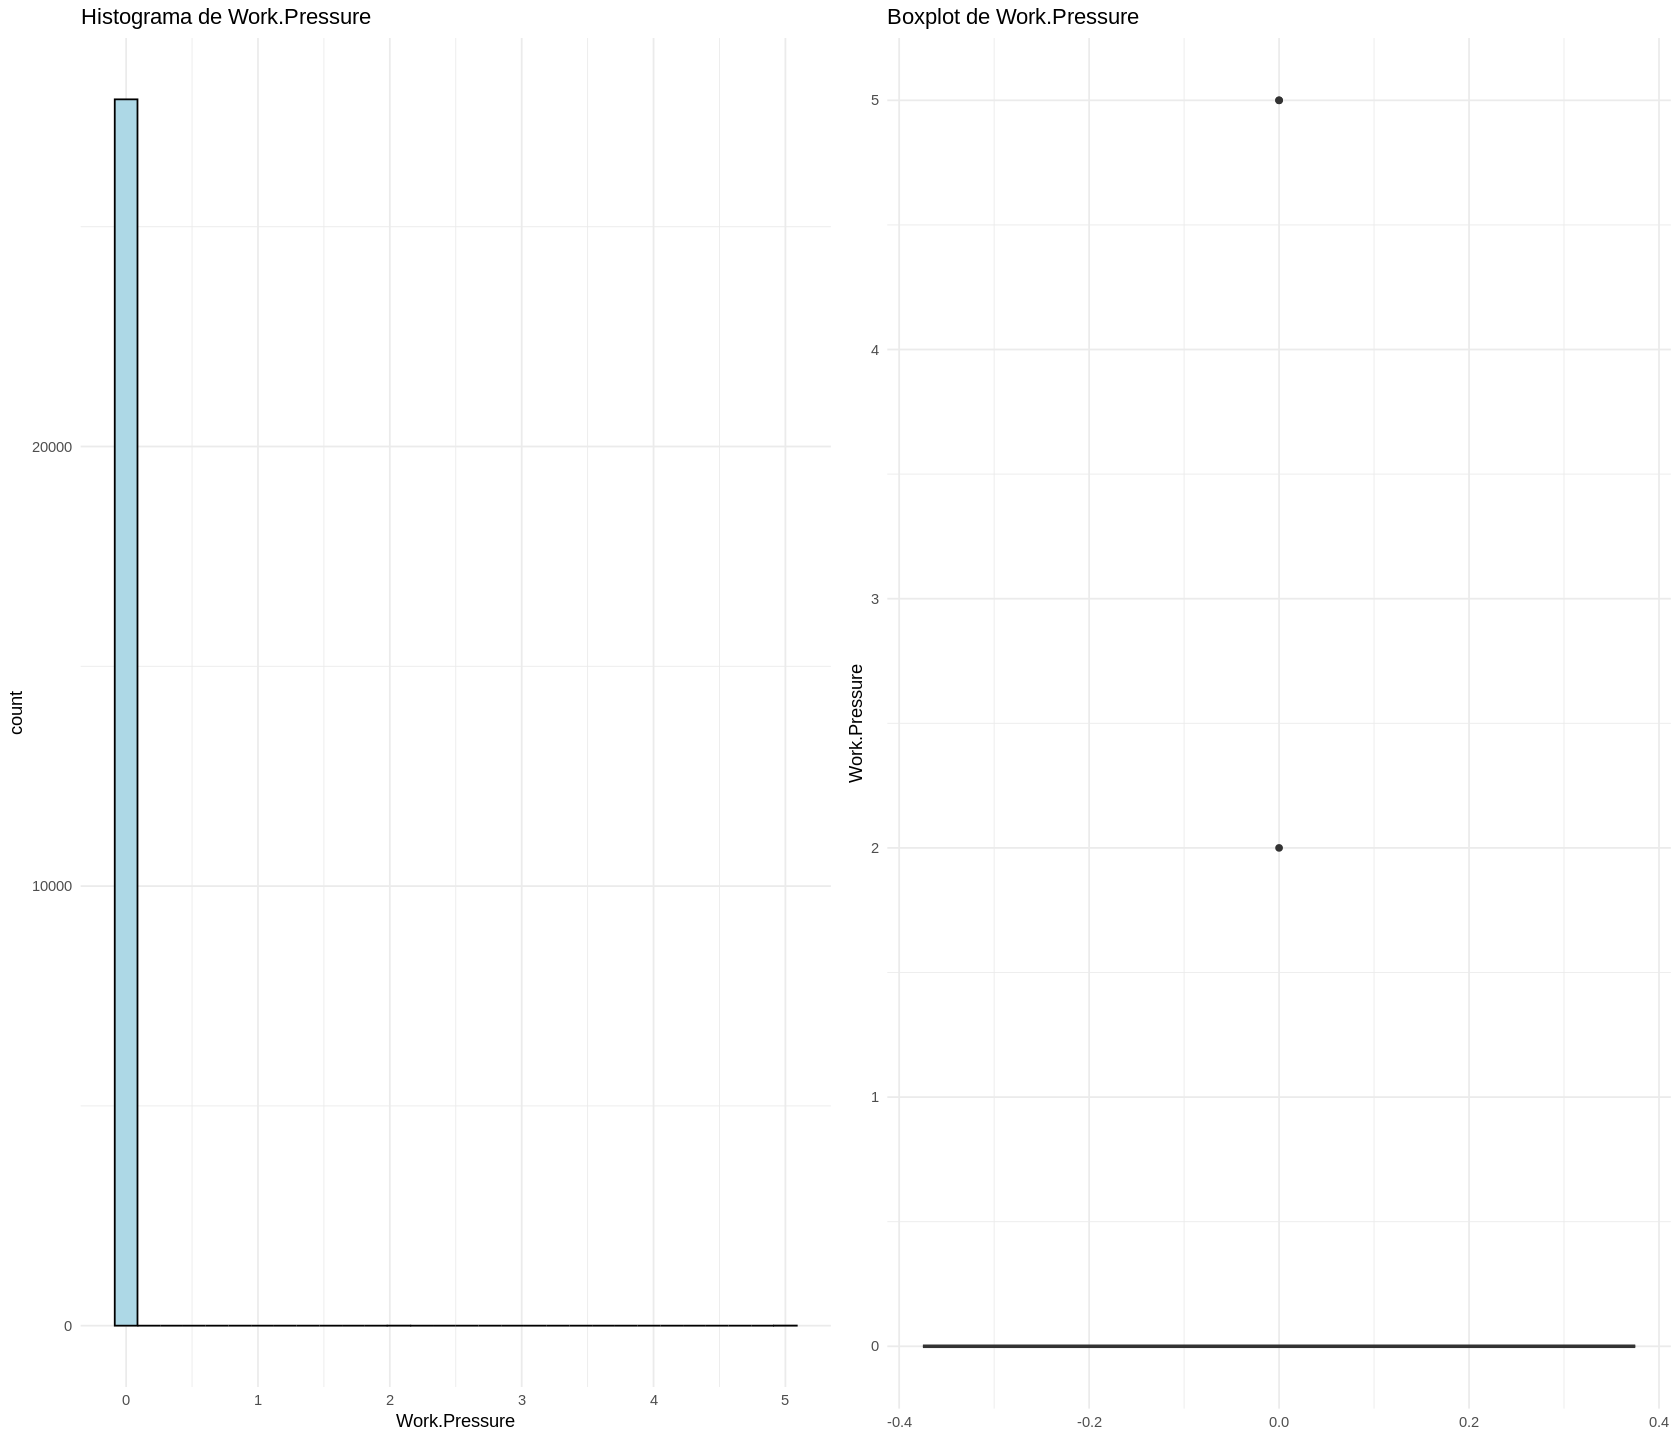

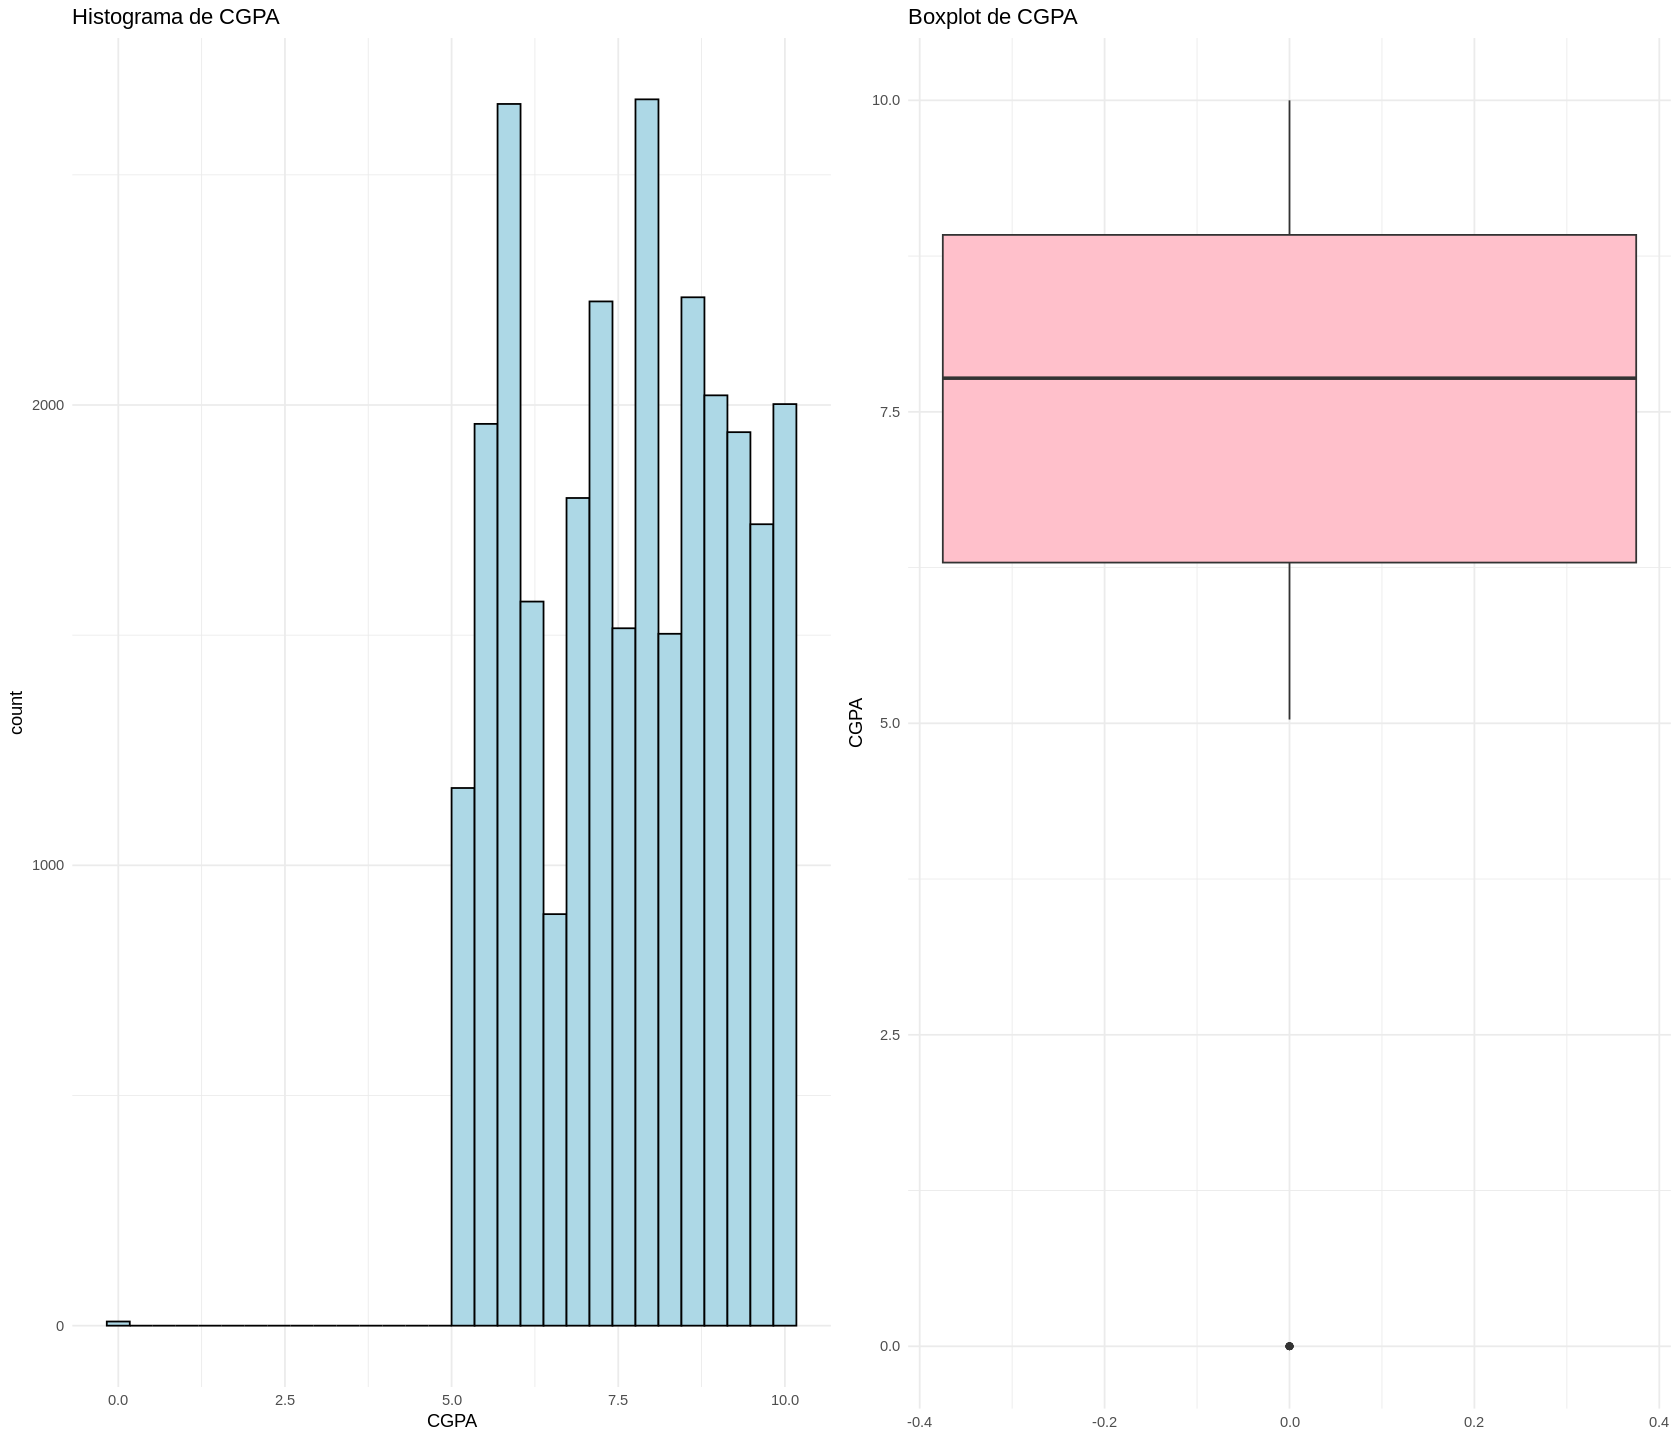

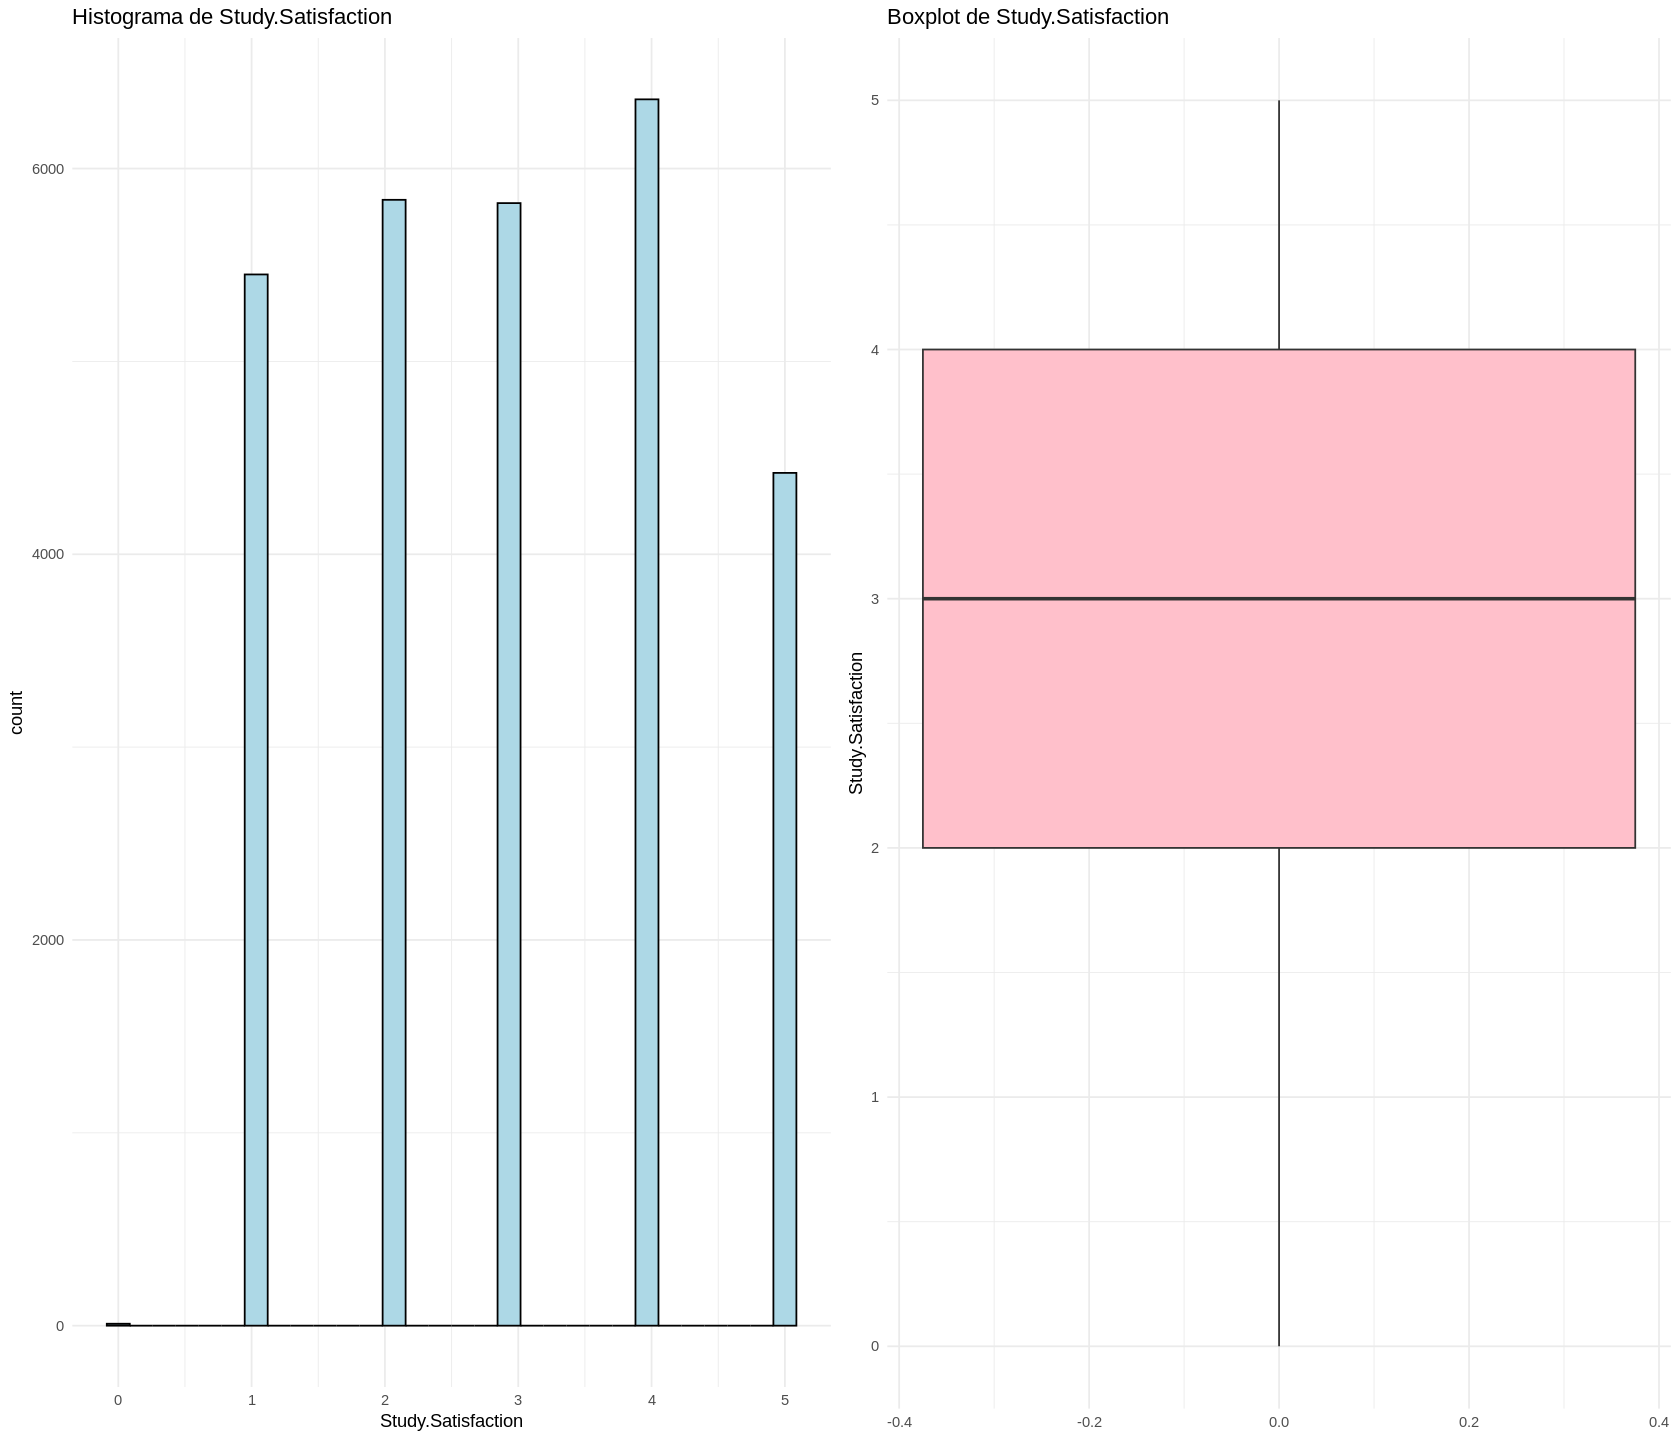

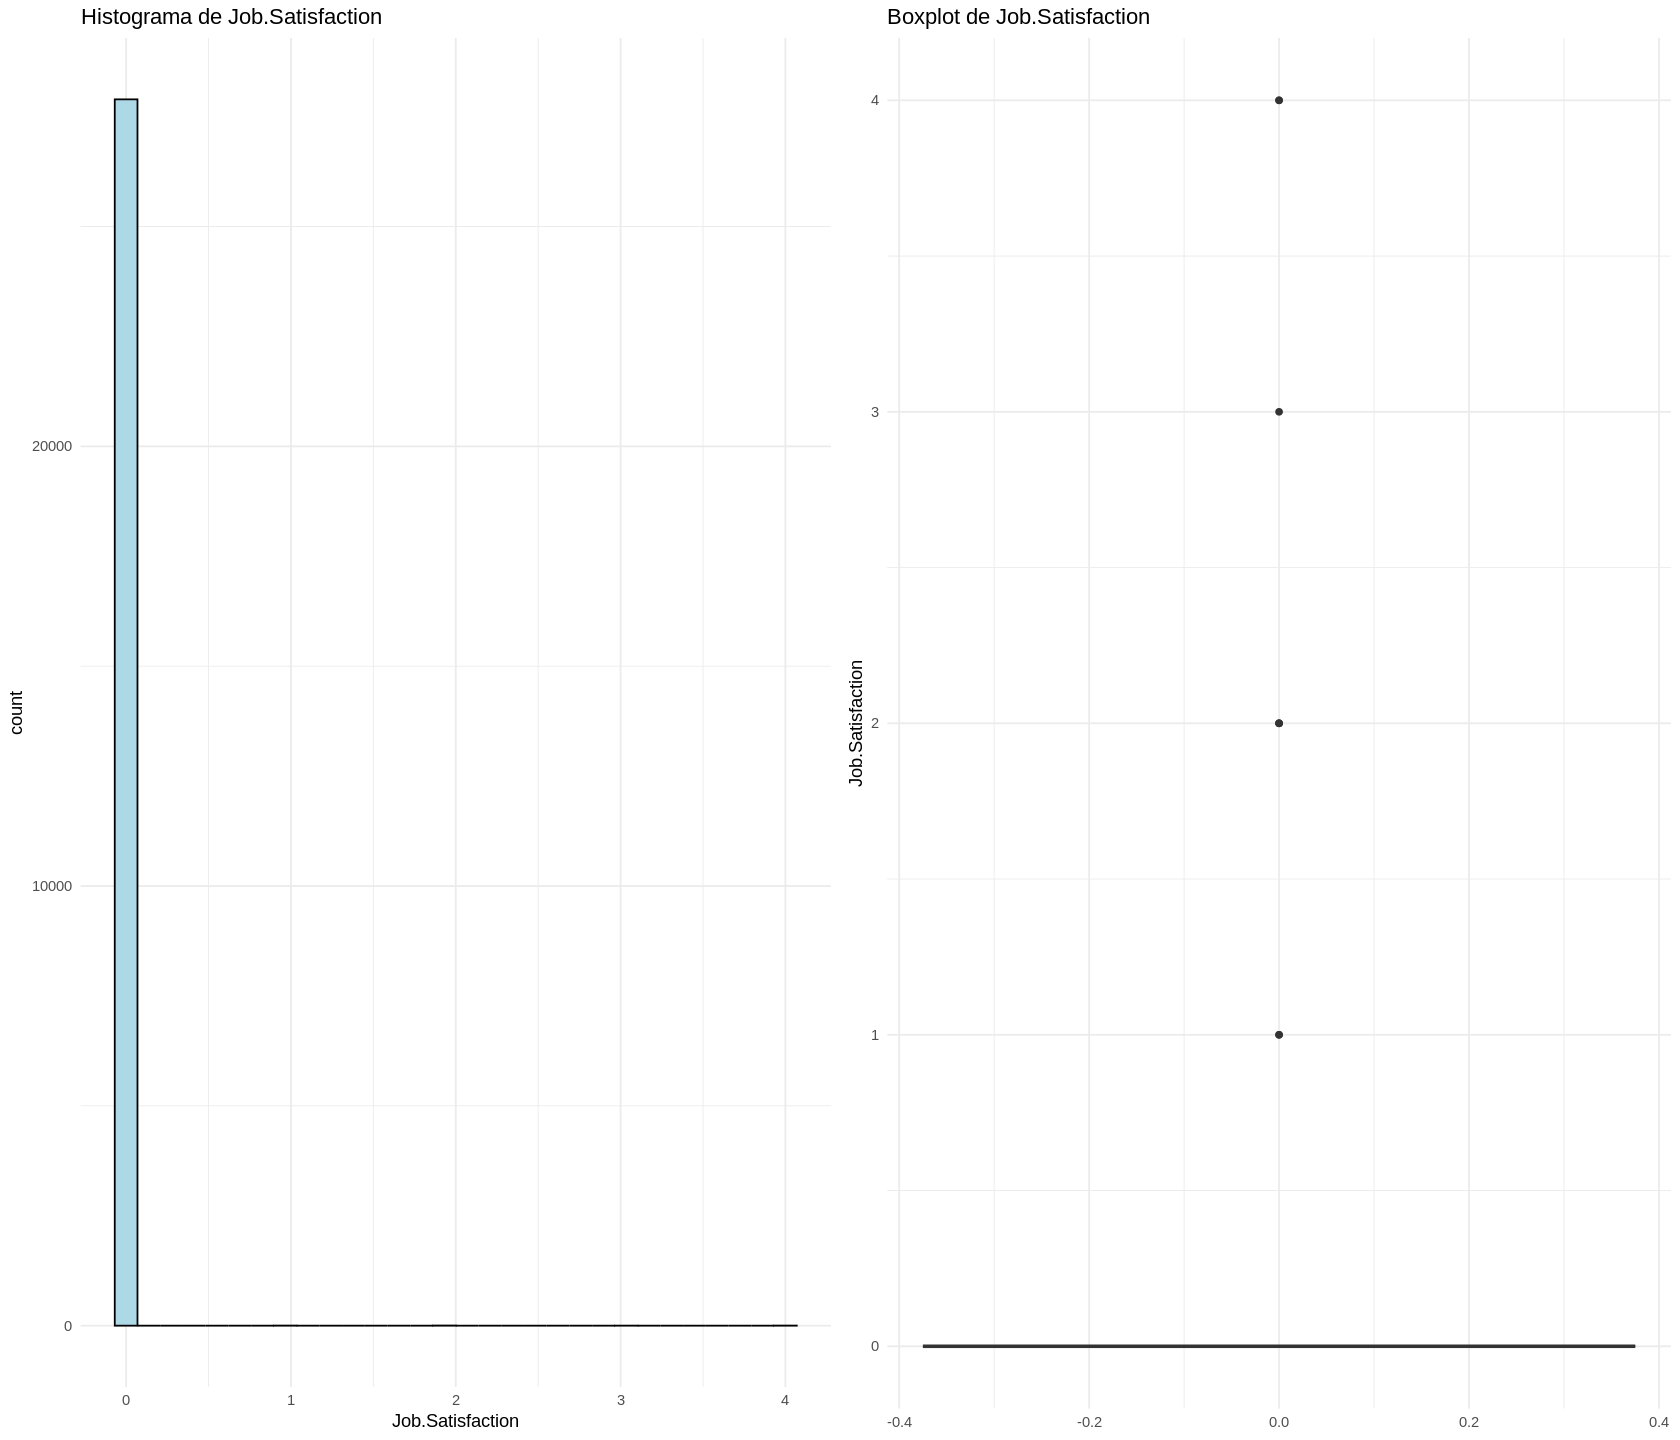

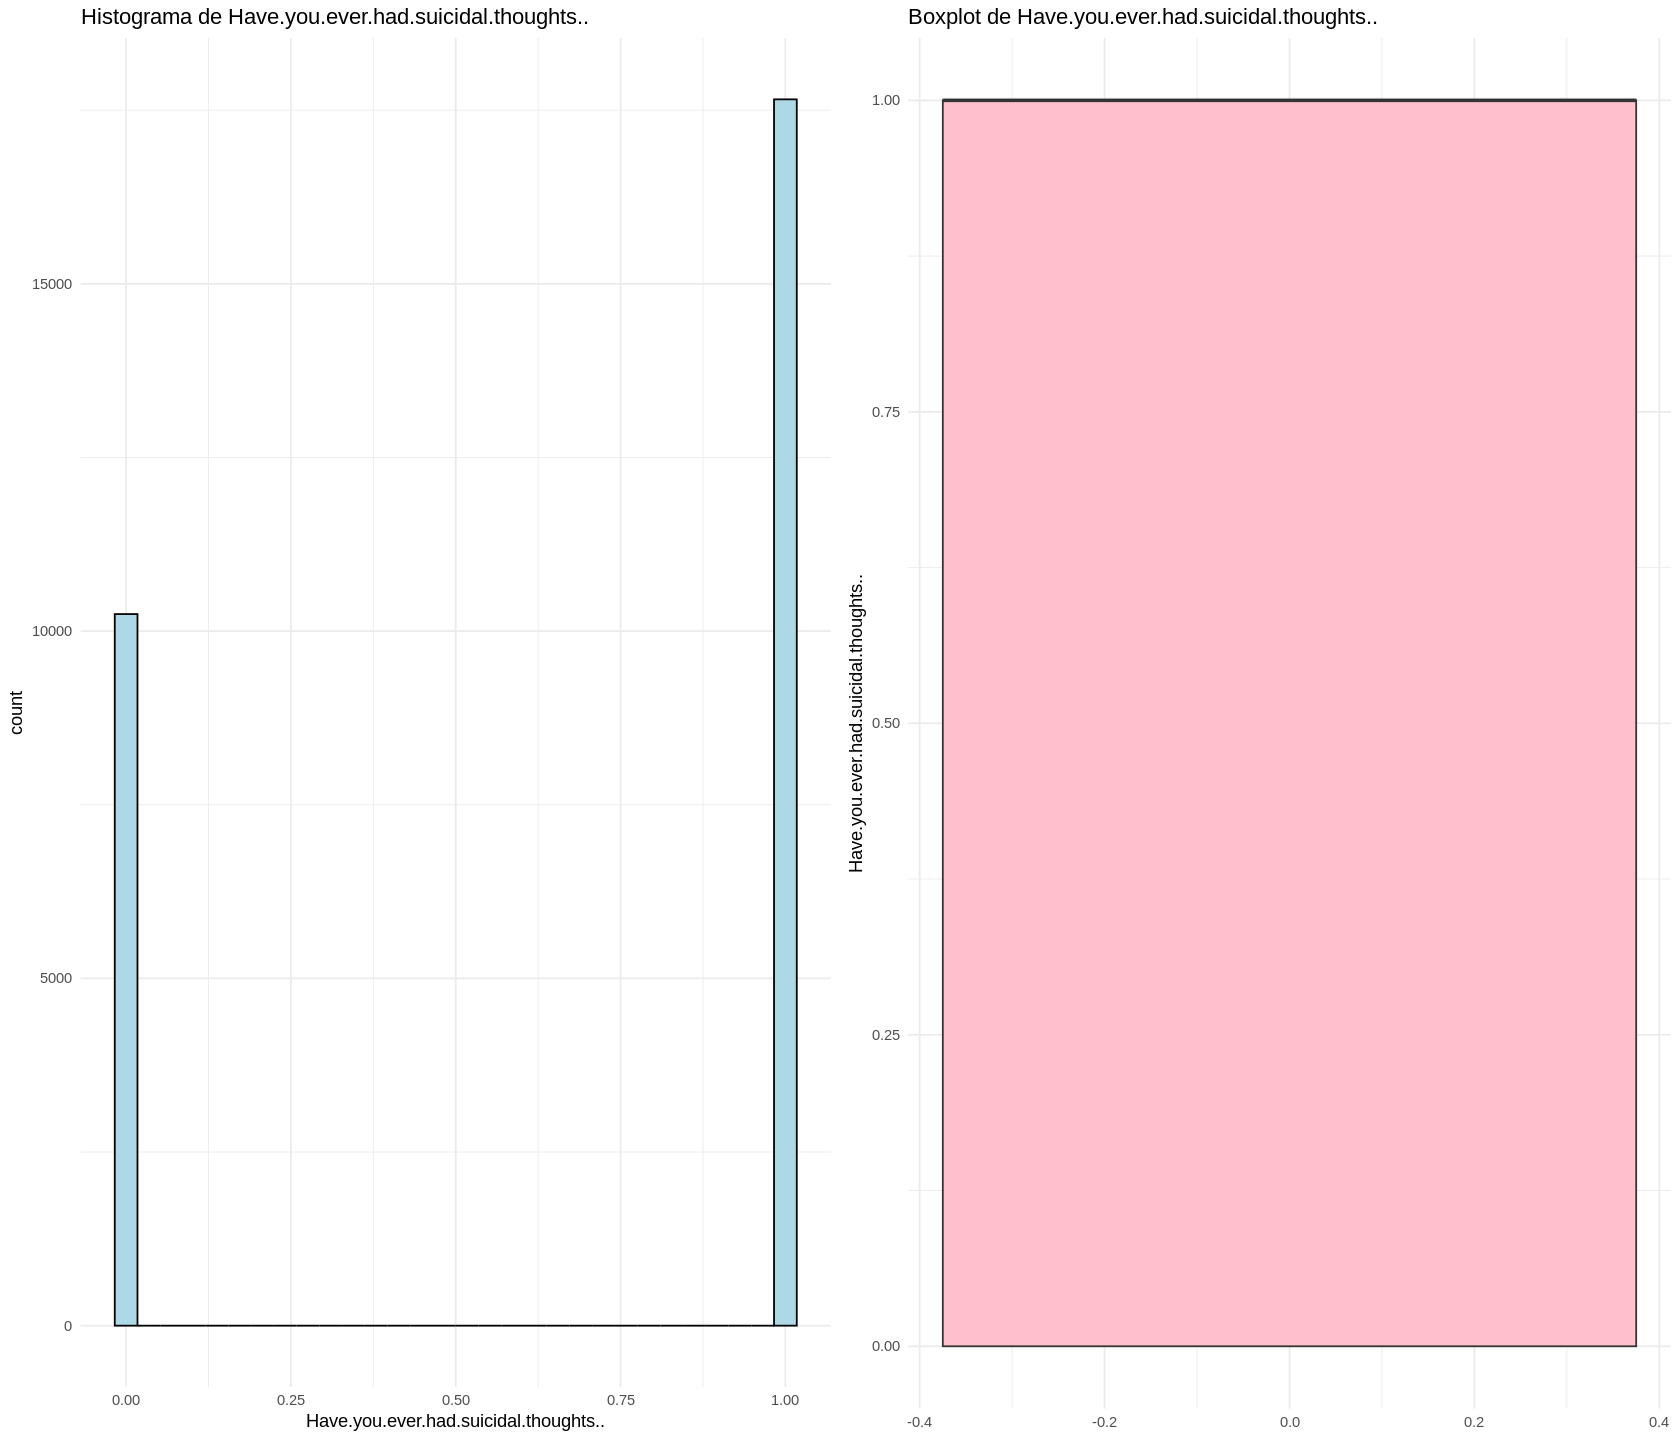

Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


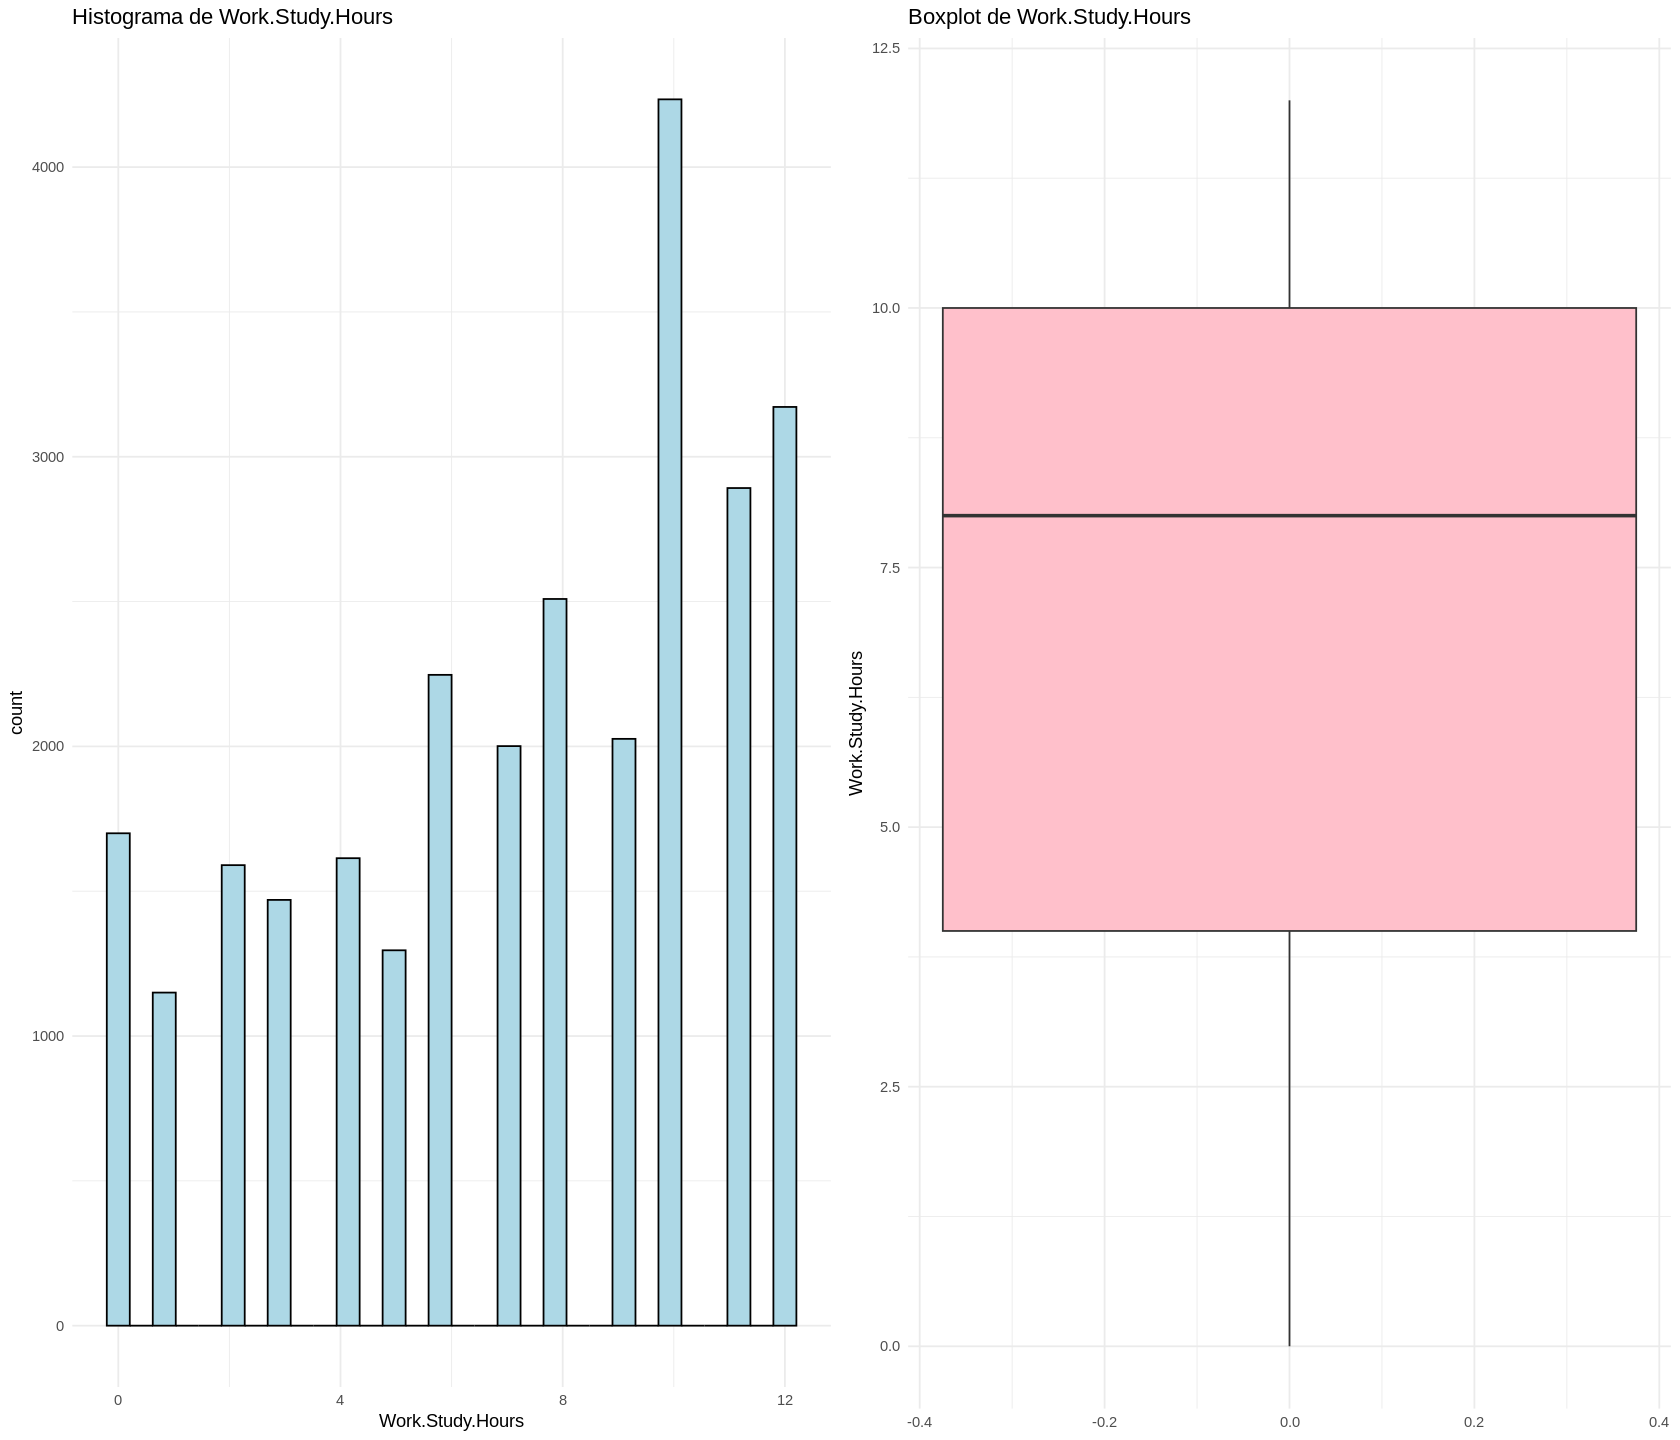

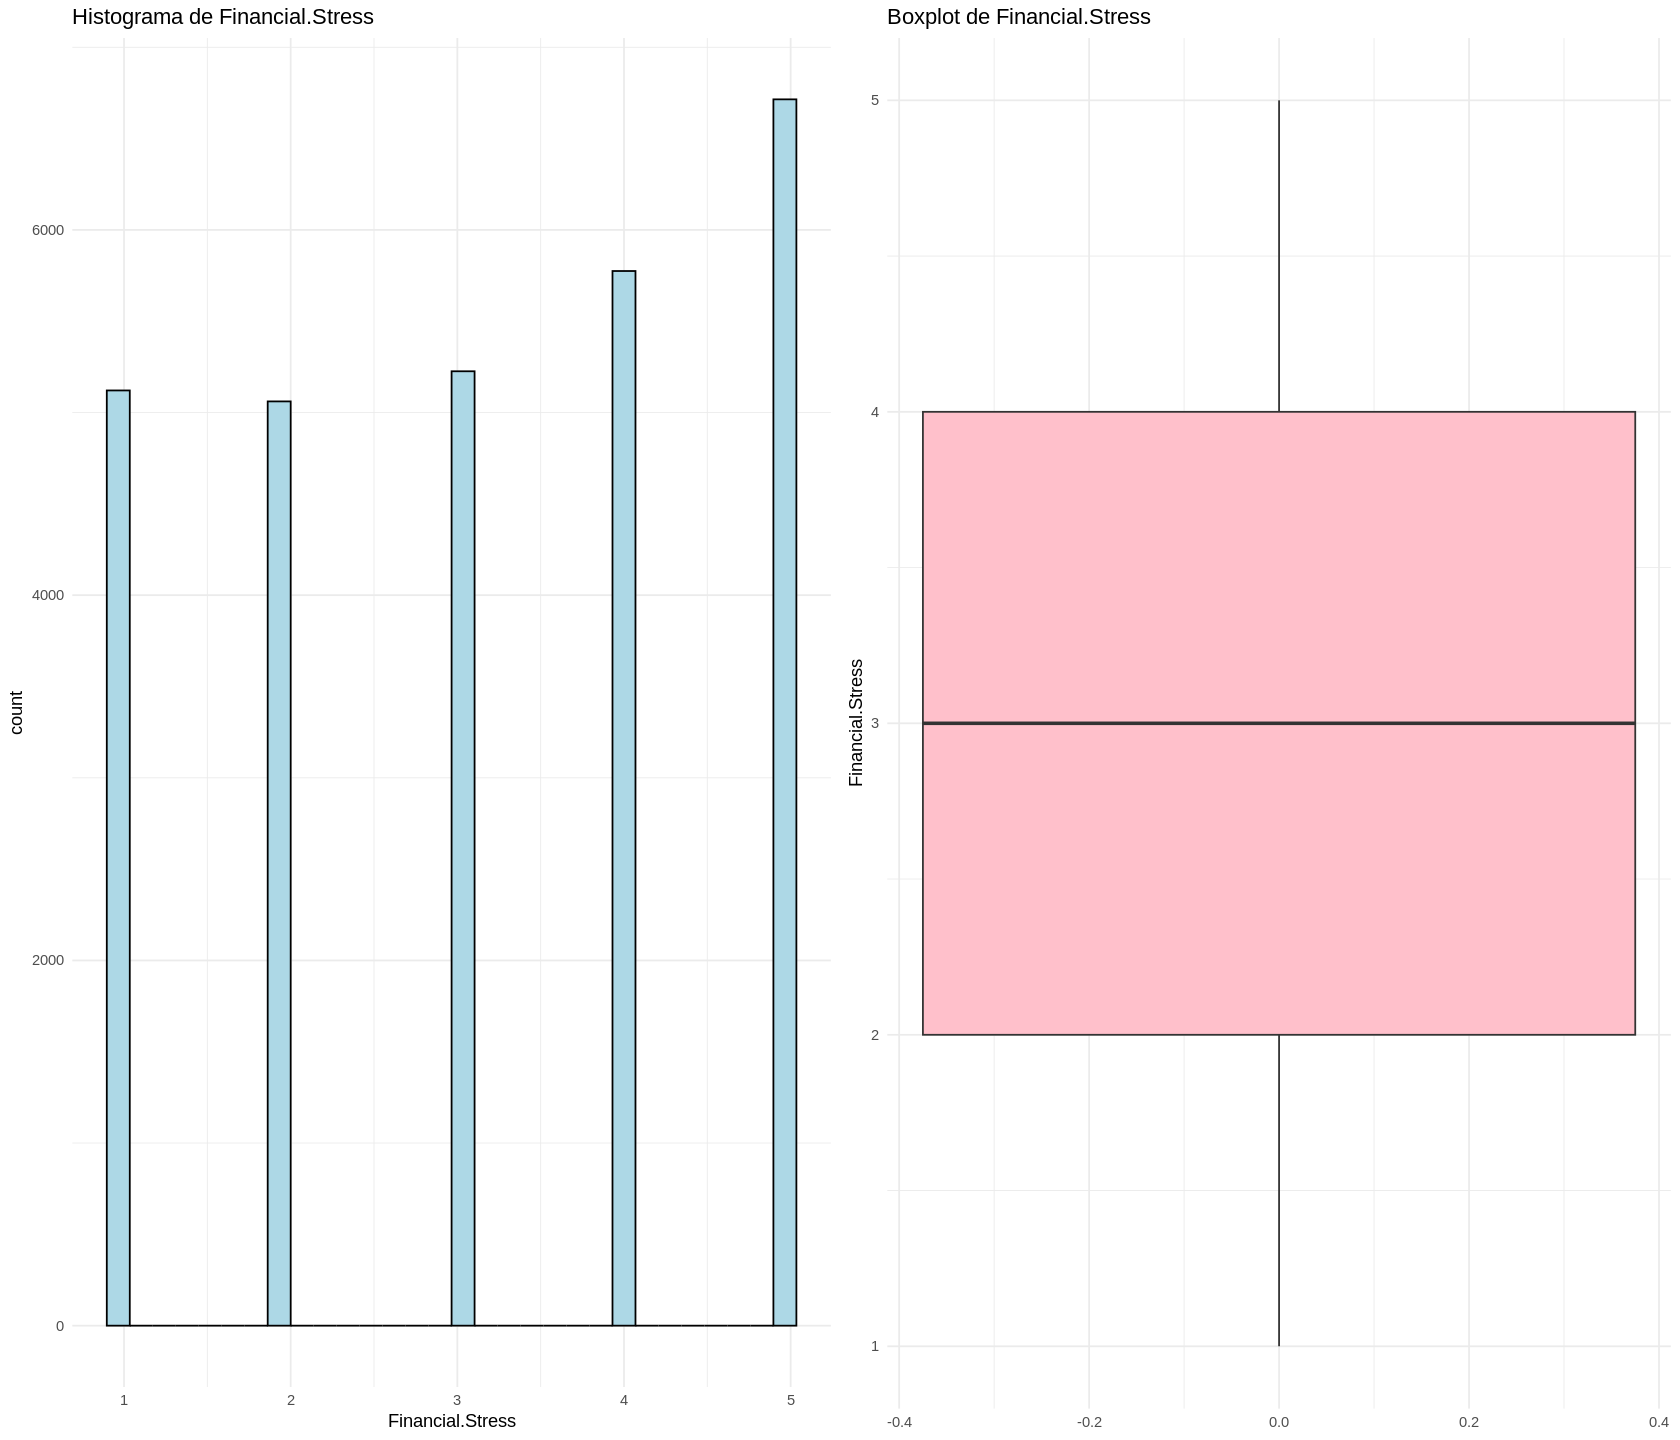

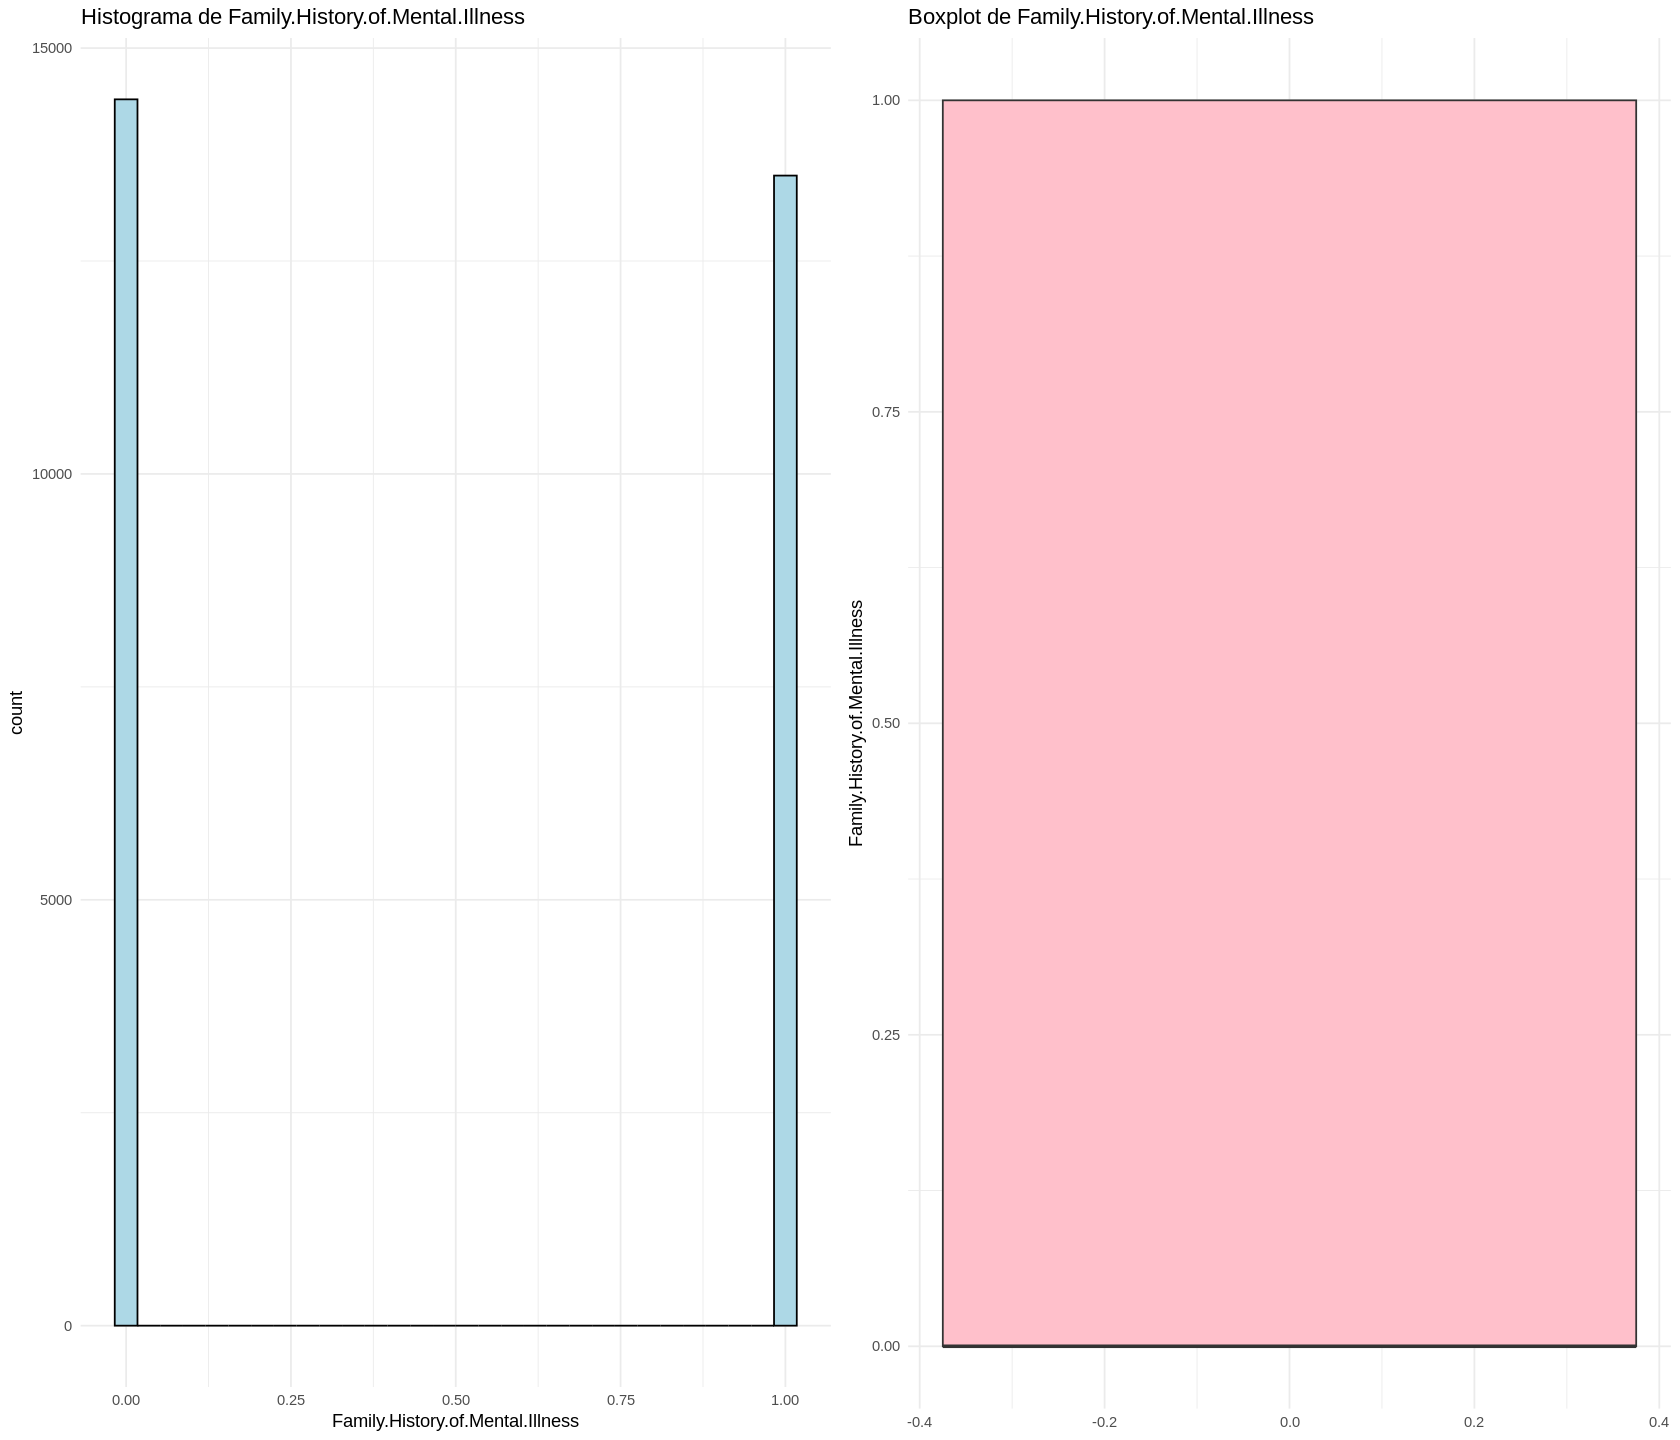

Warning message:
“Removed 12 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 12 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


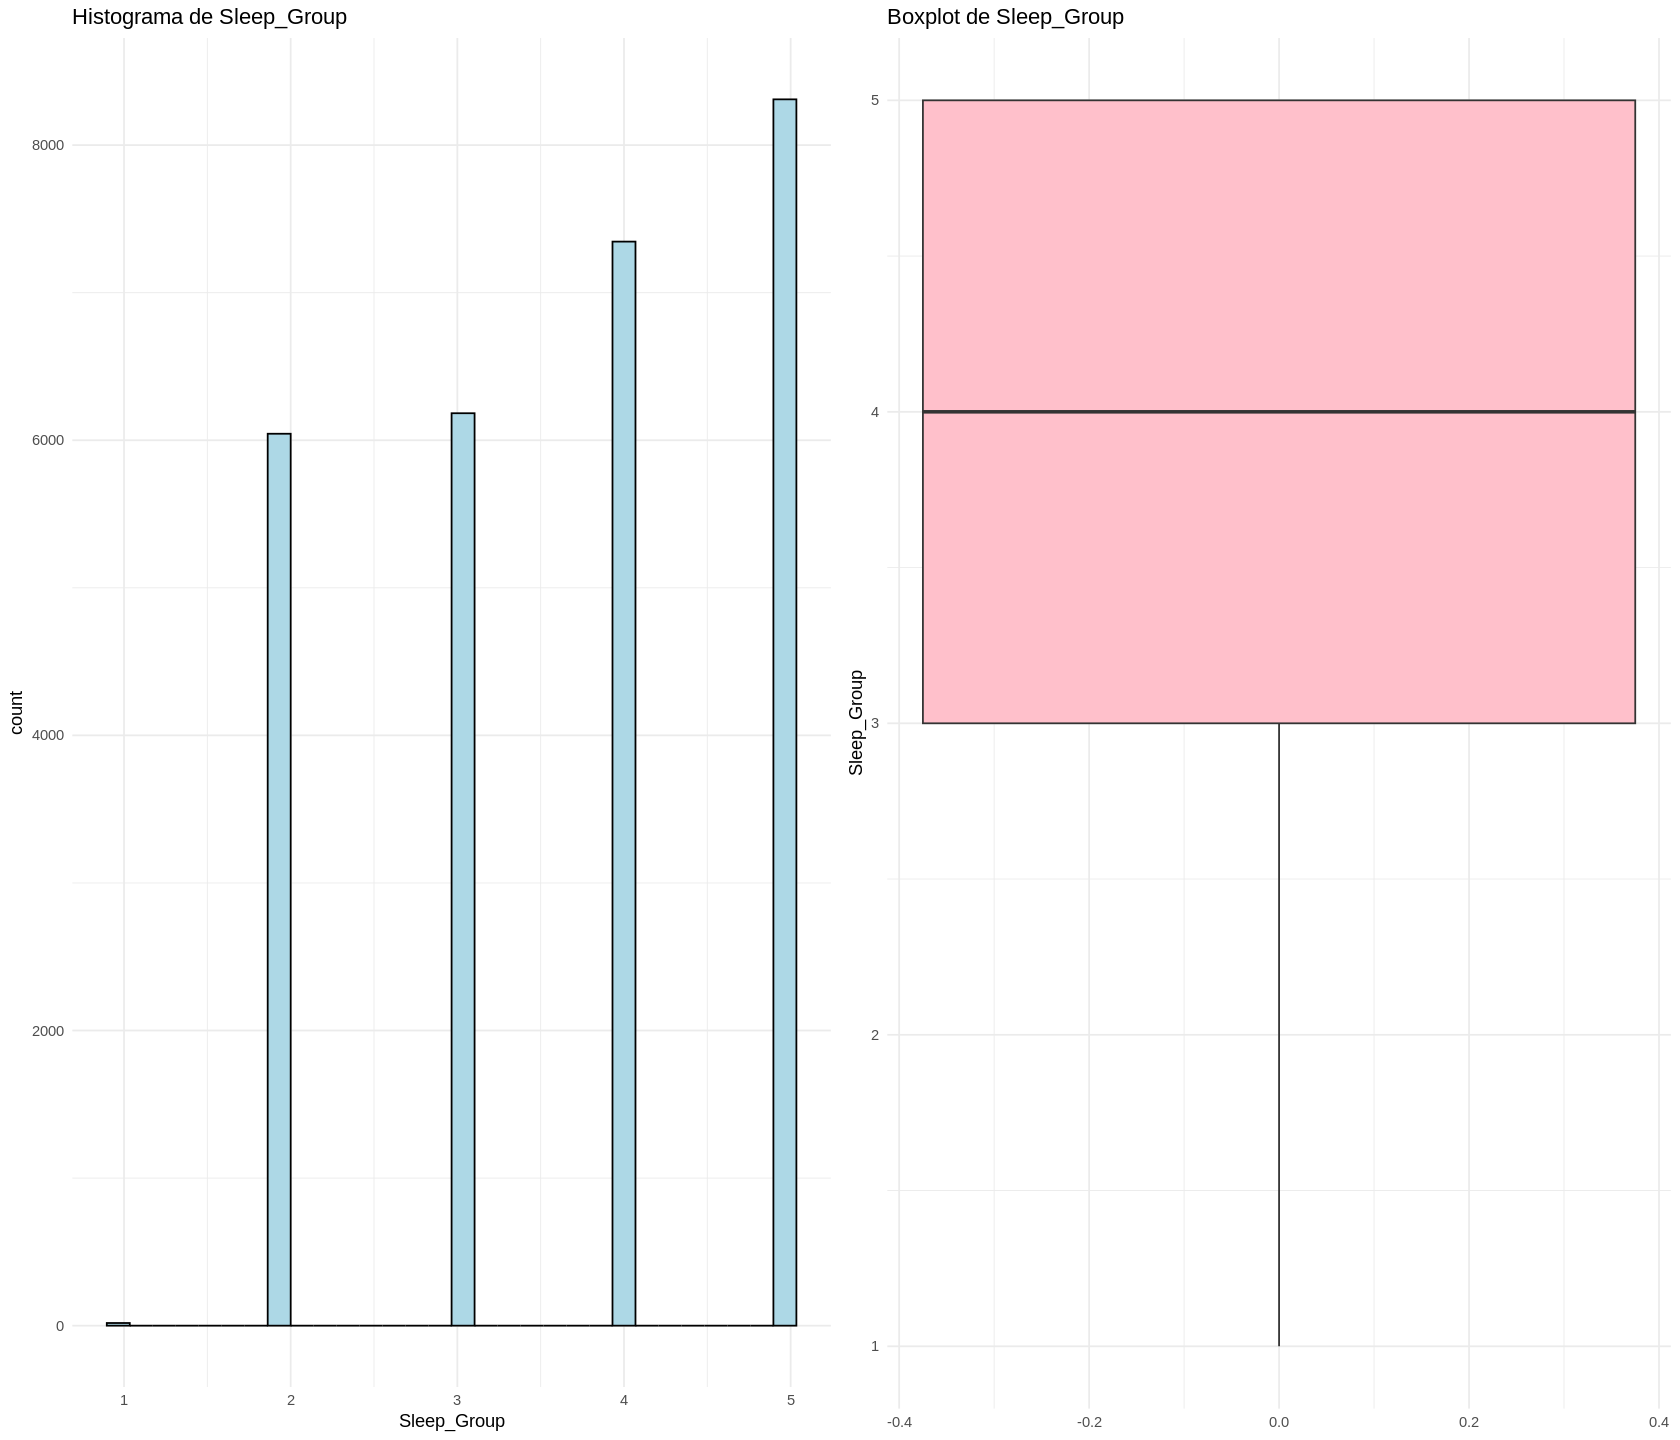

Warning message:
“Computation failed in `stat_bin()`.
Caused by error in `scales[[x]]$dimension()`:
! attempt to apply non-function”
Warning message:
“Computation failed in `stat_boxplot()`.
Caused by error in `sort.int()`:
! 'x' must be atomic”


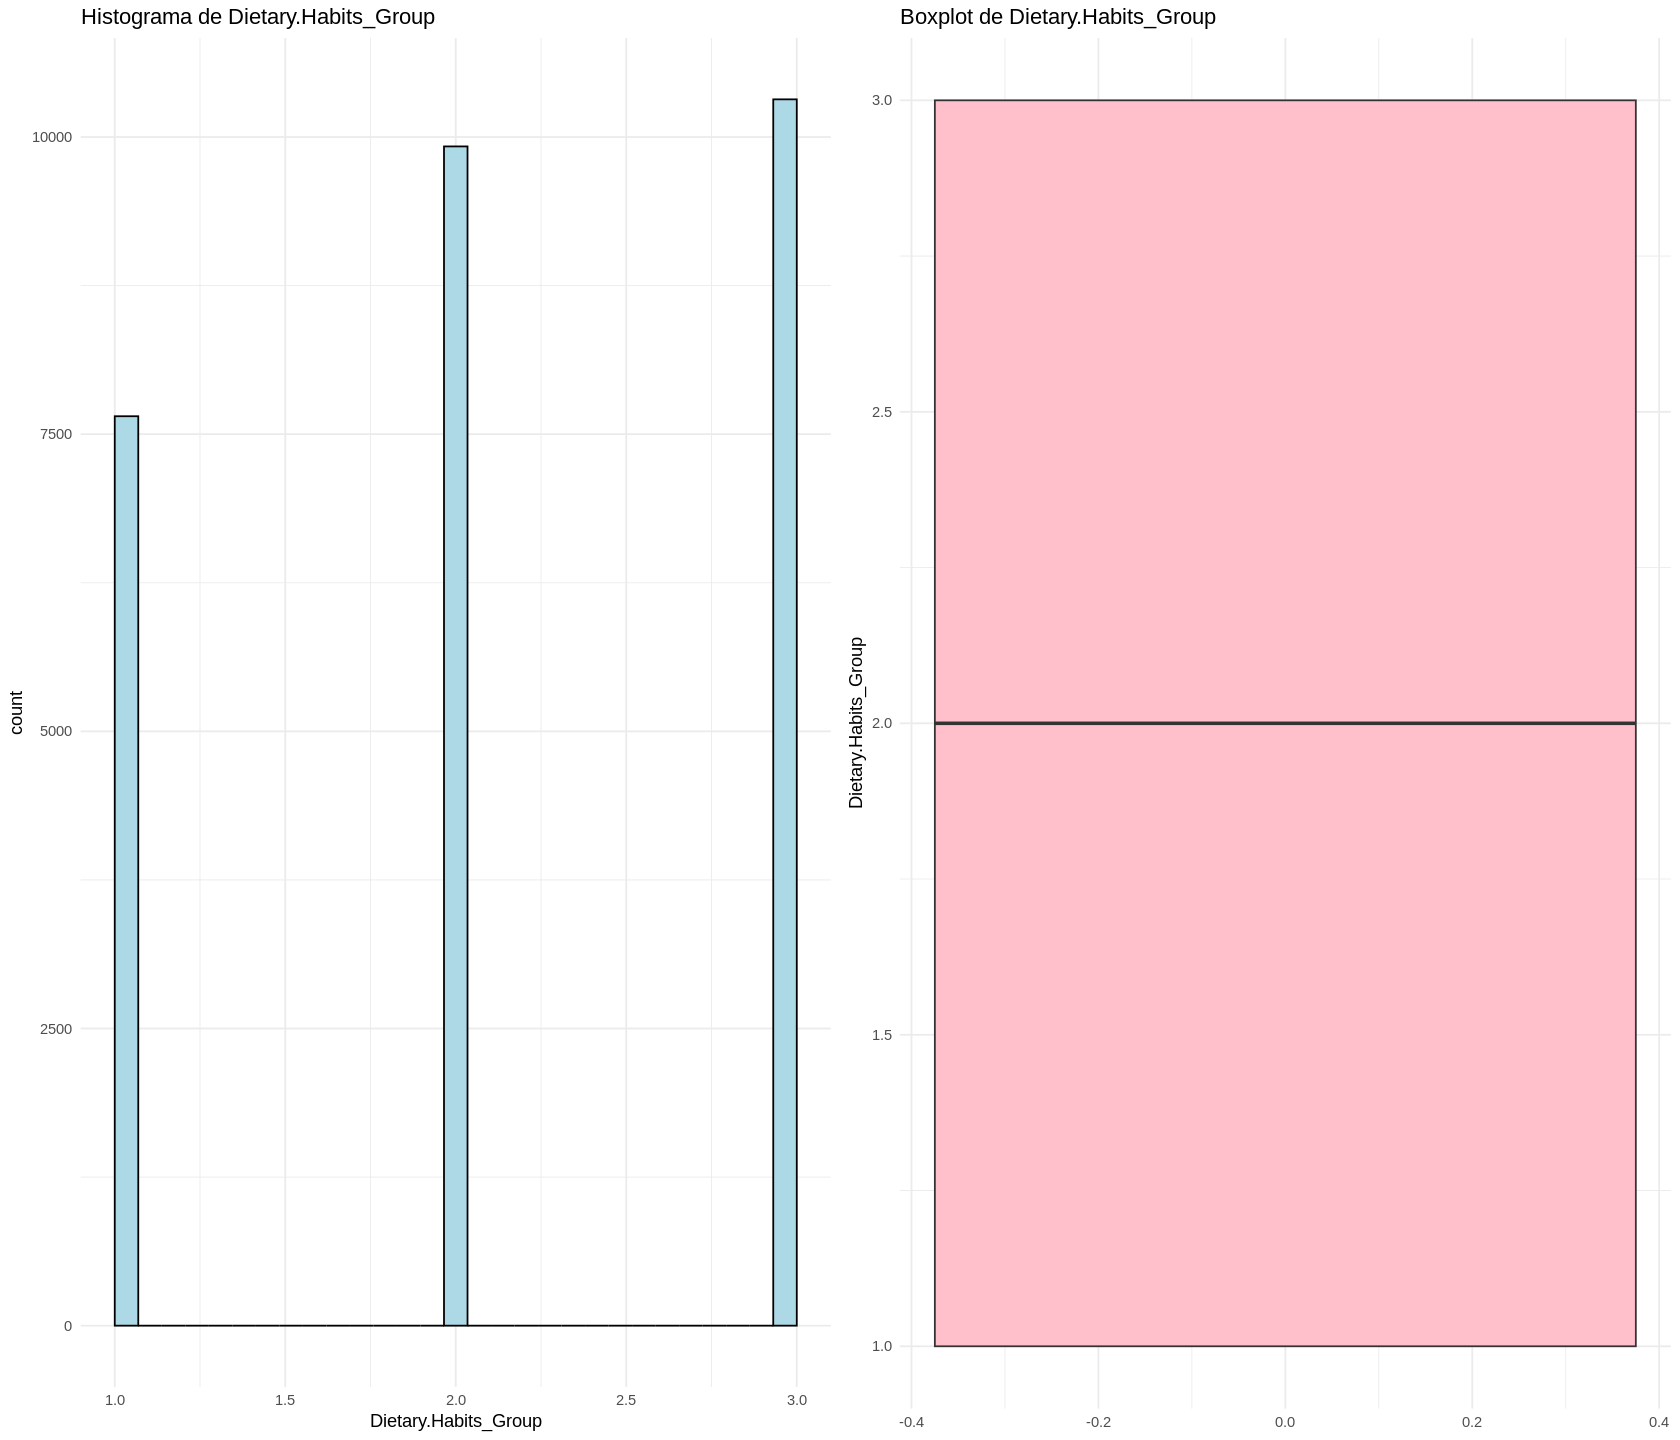

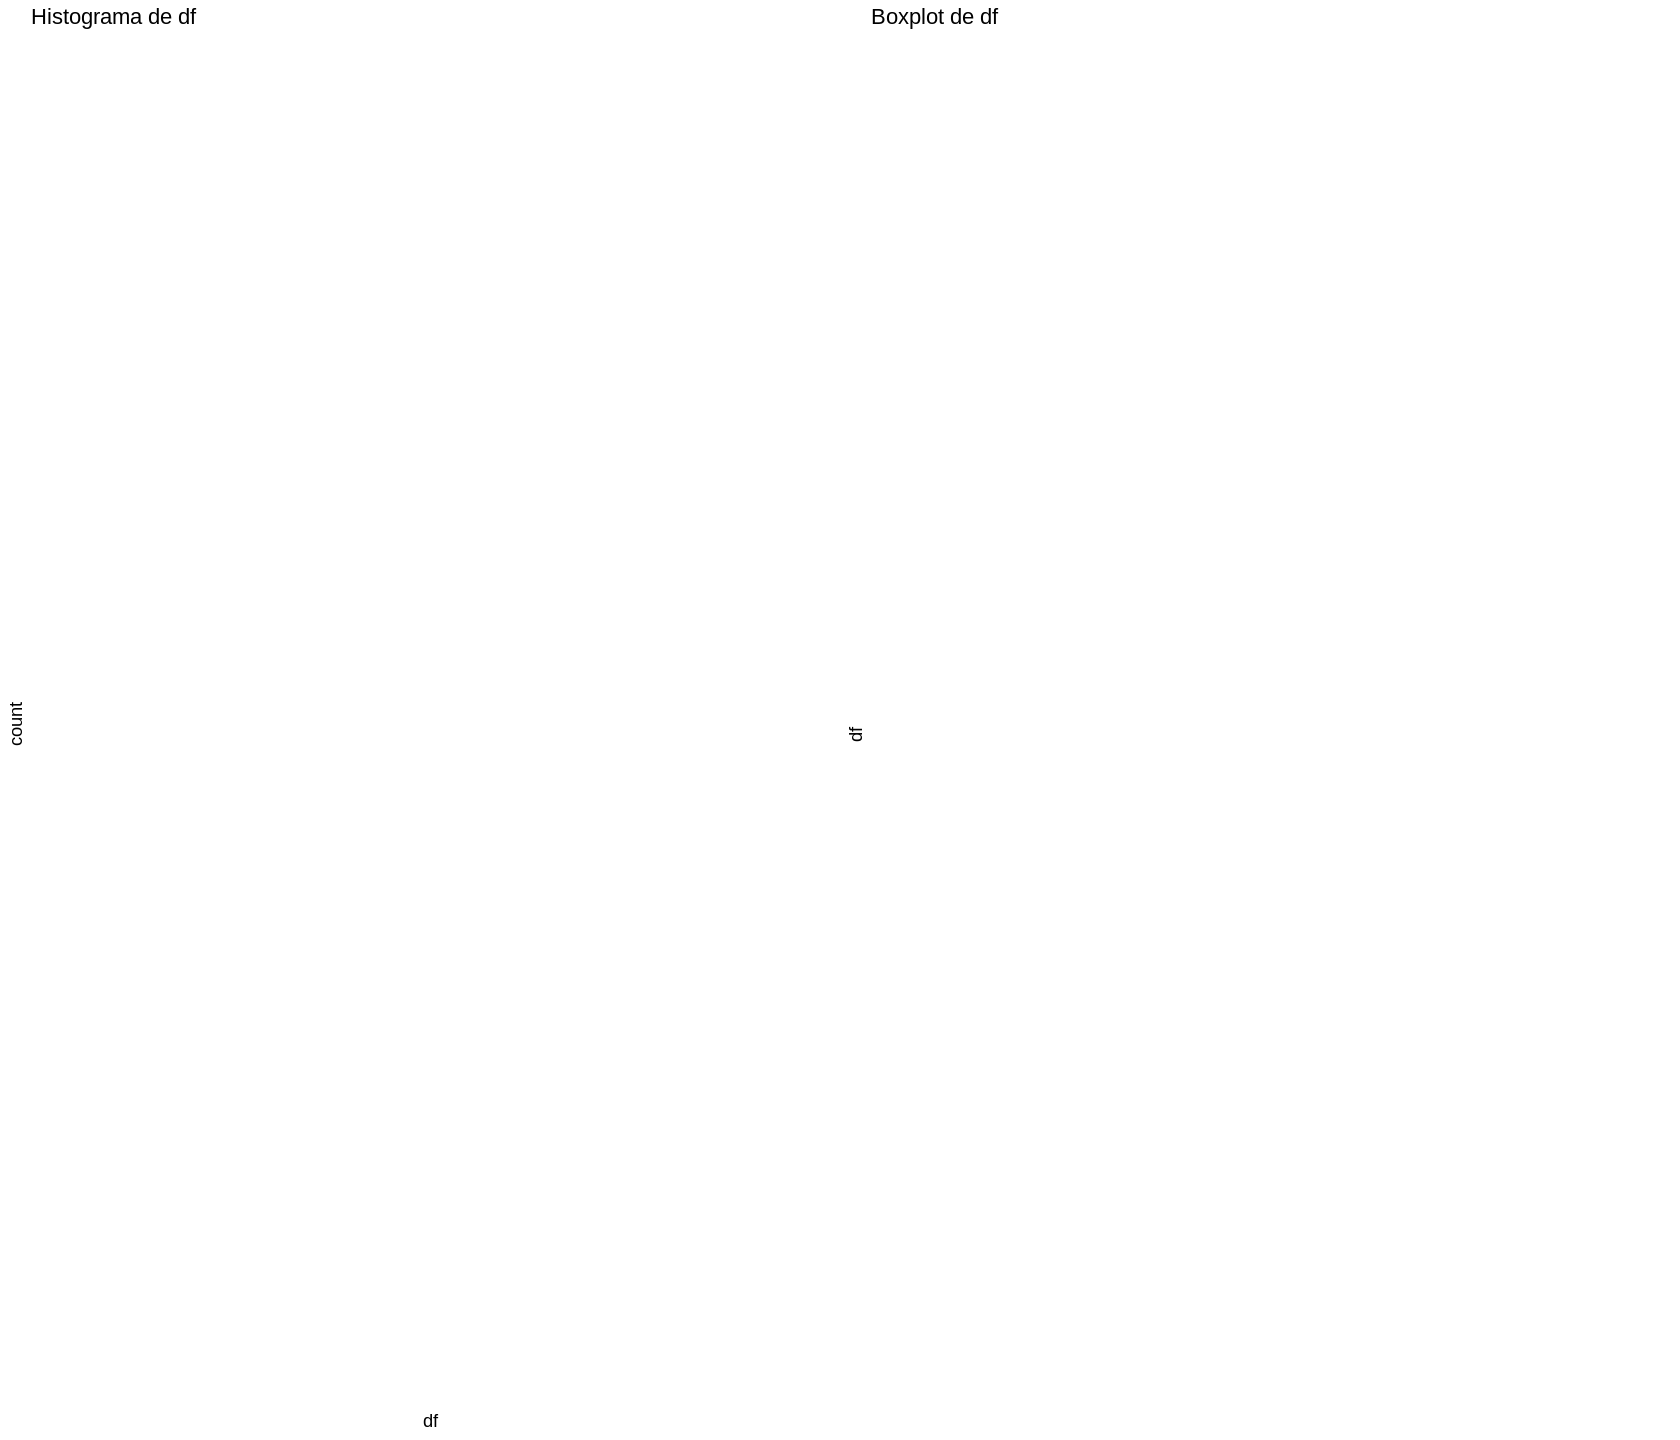

In [ ]:
# Carrega os pacotes necessários
library(ggplot2)
library(gridExtra)

# Configurar as dimensões do gráfico para ser maior
options(repr.plot.width = 14, repr.plot.height = 12)

# Supondo que seu dataframe seja 'df' e a variável alvo seja "Depression"
variavel_alvo <- "Depression"

# Seleciona as variáveis para plotar (todas numéricas exceto a variável alvo)
variaveis <- setdiff(names(df), variavel_alvo)

# Loop para gerar os gráficos para cada variável numérica
for(col in variaveis) {

  # 1. Histograma
  hist_plot <- ggplot(df, aes_string(x = col)) +
    geom_histogram(fill = "lightblue", color = "black", bins = 30) +
    ggtitle(paste("Histograma de", col)) +
    theme_minimal()

  # 2. Boxplot
  box_plot <- ggplot(df, aes_string(y = col)) +
    geom_boxplot(fill = "pink") +
    ggtitle(paste("Boxplot de", col)) +
    theme_minimal()

  # Exibe os gráficos lado a lado (2 colunas)
  grid.arrange(
    hist_plot,
    box_plot,
    ncol = 2,
    widths = c(2,2)
  )

}


## Teste de Normalidade
Como nosso dataset e bem reduzido vamos utilizar o Kolmogorov-Smirnov para nossa análise

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is n

===== Teste de Kolmogorov-Smirnov para normalidade =====
Variável: Gender - ignorada (valores idênticos ou insuficientes)



Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Age

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.09204, p-value < 2.2e-16
alternative hypothesis: two-sided




Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Academic.Pressure

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.14335, p-value < 2.2e-16
alternative hypothesis: two-sided




Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Work.Pressure

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.50379, p-value < 2.2e-16
alternative hypothesis: two-sided




Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: CGPA

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.07534, p-value < 2.2e-16
alternative hypothesis: two-sided




Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Study.Satisfaction

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.16753, p-value < 2.2e-16
alternative hypothesis: two-sided




Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Job.Satisfaction

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.50583, p-value < 2.2e-16
alternative hypothesis: two-sided


Variável: Have.you.ever.had.suicidal.thoughts.. - ignorada (valores idênticos ou insuficientes)



Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Work.Study.Hours

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.14753, p-value < 2.2e-16
alternative hypothesis: two-sided




Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Financial.Stress

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.17291, p-value < 2.2e-16
alternative hypothesis: two-sided


Variável: Family.History.of.Mental.Illness - ignorada (valores idênticos ou insuficientes)

Variável: Depression - ignorada (valores idênticos ou insuficientes)



Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Sleep_Group

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.18644, p-value < 2.2e-16
alternative hypothesis: two-sided




Warning message in ks.test.default(valores_norm, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”


Variável: Dietary.Habits_Group

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_norm
D = 0.2417, p-value < 2.2e-16
alternative hypothesis: two-sided




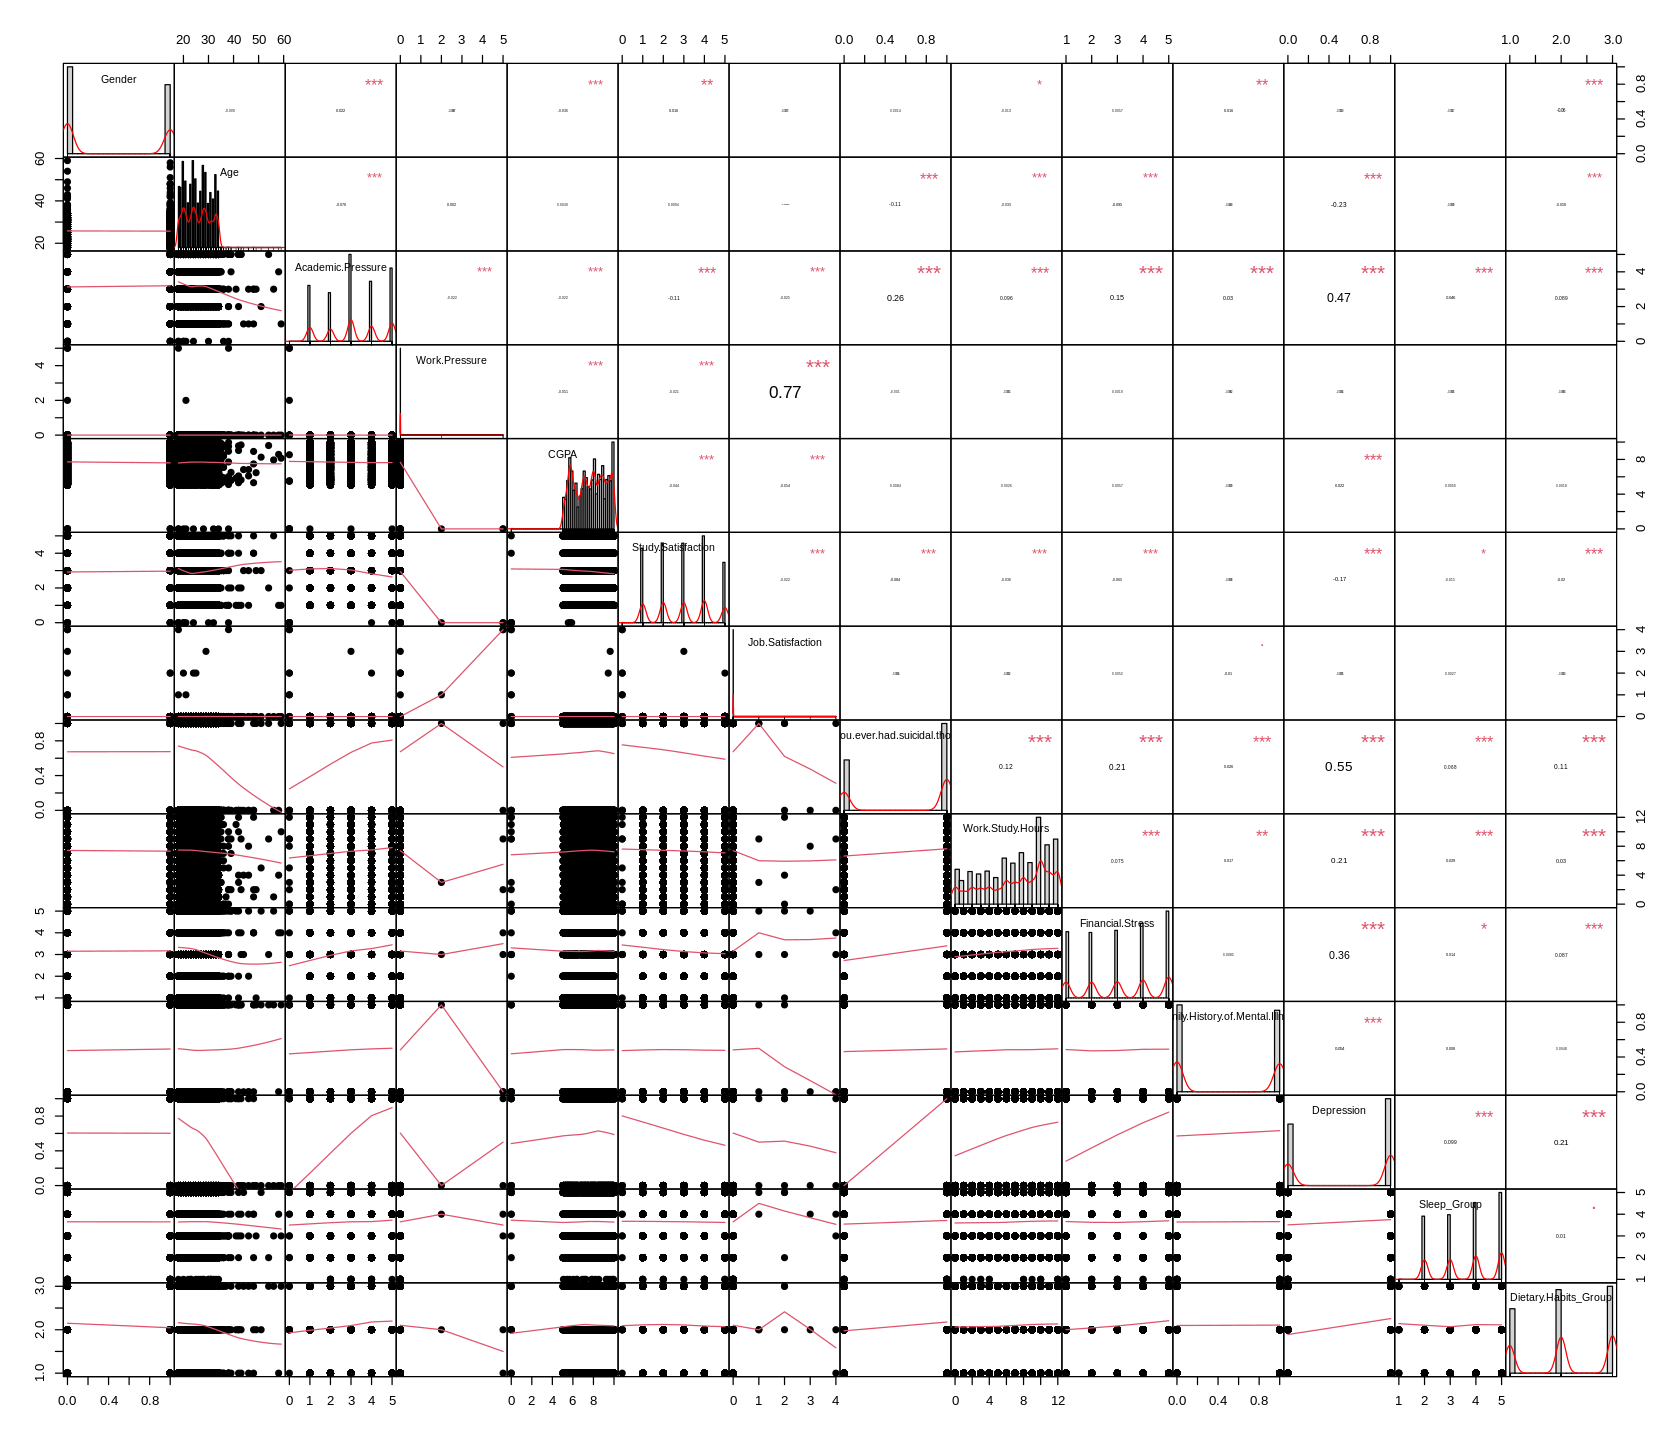

In [ ]:
# Carregar os pacotes
library(PerformanceAnalytics)

# Configurar as dimensões do gráfico para ser maior
options(repr.plot.width = 14, repr.plot.height = 12)

# Remover colunas com NA
df <- na.omit(df)

# Filtrar colunas numéricas
df_numerico <- df[, sapply(df, is.numeric)]

# === Gráfico de Correlação com Histograma e Dispersão ===
chart.Correlation(df_numerico, histogram = TRUE, pch = 19)

# === Teste de Normalidade de Kolmogorov-Smirnov ===
cat("===== Teste de Kolmogorov-Smirnov para normalidade =====\n")

for (col in names(df_numerico)) {
  valores <- df_numerico[[col]]

  if (length(unique(valores)) > 2) {
    # Normaliza os dados (z-score)
    valores_norm <- scale(valores)

    resultado <- tryCatch({
      ks.test(valores_norm, "pnorm")  # pnorm = distribuição normal padrão
    }, error = function(e) {
      return(paste("Erro em", col, ":", e$message))
    })

    cat(paste0("Variável: ", col, "\n"))
    print(resultado)
    cat("\n")
  } else {
    cat(paste0("Variável: ", col, " - ignorada (valores idênticos ou insuficientes)\n\n"))
  }
}


Isso demostra que nossa distribuição não segue como uma distribuição Normal

In [ ]:
# === Correlação de Spearman ===
cat("===== Correlação de Spearman entre variáveis numéricas =====\n")

variaveis <- names(df_numerico)

for (i in 1:(length(variaveis) - 1)) {
  for (j in (i + 1):length(variaveis)) {
    col1 <- variaveis[i]
    col2 <- variaveis[j]

    x <- df_numerico[[col1]]
    y <- df_numerico[[col2]]

    # Verifica se há pelo menos 3 valores únicos em ambas as variáveis
    if (length(unique(x)) > 2 && length(unique(y)) > 2) {
      resultado <- tryCatch({
        cor.test(x, y, method = "spearman")
      }, error = function(e) {
        return(paste("Erro ao correlacionar", col1, "e", col2, ":", e$message))
      })

      cat(paste0("Correlação Spearman entre '", col1, "' e '", col2, "':\n"))
      print(resultado)
      cat("\n")
    } else {
      cat(paste0("Par ignorado: '", col1, "' e '", col2, "' (valores idênticos ou insuficientes)\n\n"))
    }
  }
}


===== Correlação de Spearman entre variáveis numéricas =====
Par ignorado: 'Gender' e 'Age' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Academic.Pressure' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Work.Pressure' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'CGPA' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Study.Satisfaction' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Job.Satisfaction' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Have.you.ever.had.suicidal.thoughts..' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Work.Study.Hours' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Financial.Stress' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Depression' (valores idênticos ou insuficientes)

Par ignorado: 'Gender' e 'Sleep

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Academic.Pressure':

	Spearman's rank correlation rho

data:  x and y
S = 3.894e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07742513 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Work.Pressure':

	Spearman's rank correlation rho

data:  x and y
S = 3.6249e+12, p-value = 0.6184
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.002982781 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'CGPA':

	Spearman's rank correlation rho

data:  x and y
S = 3.5889e+12, p-value = 0.2428
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.006994425 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Study.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 3.5834e+12, p-value = 0.1551
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.008514392 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Job.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 3.6407e+12, p-value = 0.2209
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.007330818 


Par ignorado: 'Age' e 'Have.you.ever.had.suicidal.thoughts..' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Work.Study.Hours':

	Spearman's rank correlation rho

data:  x and y
S = 3.7204e+12, p-value = 9.074e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02940206 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Financial.Stress':

	Spearman's rank correlation rho

data:  x and y
S = 3.9592e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.09545856 


Par ignorado: 'Age' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Age' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.6263e+12, p-value = 0.5745
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.003362531 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Age' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.8251e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05836727 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'Work.Pressure':

	Spearman's rank correlation rho

data:  x and y
S = 3.6806e+12, p-value = 0.002142
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01838218 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'CGPA':

	Spearman's rank correlation rho

data:  x and y
S = 3.7006e+12, p-value = 6.542e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02390523 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'Study.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 4.0335e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
-0.11603 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'Job.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 3.6918e+12, p-value = 0.000334
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02148109 


Par ignorado: 'Academic.Pressure' e 'Have.you.ever.had.suicidal.thoughts..' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'Work.Study.Hours':

	Spearman's rank correlation rho

data:  x and y
S = 3.2849e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09110712 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'Financial.Stress':

	Spearman's rank correlation rho

data:  x and y
S = 3.0711e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1502529 


Par ignorado: 'Academic.Pressure' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Academic.Pressure' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.4502e+12, p-value = 3.44e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04537377 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Academic.Pressure' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.2893e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08988322 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Pressure' e 'CGPA':

	Spearman's rank correlation rho

data:  x and y
S = 3.6791e+12, p-value = 0.002705
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0179608 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Pressure' e 'Study.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 3.6805e+12, p-value = 0.002188
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01834446 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Pressure' e 'Job.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 1.401e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6123615 


Par ignorado: 'Work.Pressure' e 'Have.you.ever.had.suicidal.thoughts..' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Pressure' e 'Work.Study.Hours':

	Spearman's rank correlation rho

data:  x and y
S = 3.6398e+12, p-value = 0.2364
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.007091287 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Pressure' e 'Financial.Stress':

	Spearman's rank correlation rho

data:  x and y
S = 3.6109e+12, p-value = 0.8812
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
0.0008946372 


Par ignorado: 'Work.Pressure' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Work.Pressure' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Pressure' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.6155e+12, p-value = 0.9492
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.000381368 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Pressure' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.6353e+12, p-value = 0.3293
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.005841826 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'CGPA' e 'Study.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 3.7813e+12, p-value = 1.119e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04623721 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'CGPA' e 'Job.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 3.6738e+12, p-value = 0.005828
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01651148 


Par ignorado: 'CGPA' e 'Have.you.ever.had.suicidal.thoughts..' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'CGPA' e 'Work.Study.Hours':

	Spearman's rank correlation rho

data:  x and y
S = 3.6027e+12, p-value = 0.5972
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.003164695 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'CGPA' e 'Financial.Stress':

	Spearman's rank correlation rho

data:  x and y
S = 3.5929e+12, p-value = 0.3269
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.005870747 


Par ignorado: 'CGPA' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'CGPA' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'CGPA' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.5983e+12, p-value = 0.4643
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.004382351 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'CGPA' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.6093e+12, p-value = 0.8213
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.001353001 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Study.Satisfaction' e 'Job.Satisfaction':

	Spearman's rank correlation rho

data:  x and y
S = 3.6837e+12, p-value = 0.001308
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01924684 


Par ignorado: 'Study.Satisfaction' e 'Have.you.ever.had.suicidal.thoughts..' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Study.Satisfaction' e 'Work.Study.Hours':

	Spearman's rank correlation rho

data:  x and y
S = 3.7409e+12, p-value = 4.761e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0350544 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Study.Satisfaction' e 'Financial.Stress':

	Spearman's rank correlation rho

data:  x and y
S = 3.8456e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06404289 


Par ignorado: 'Study.Satisfaction' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Study.Satisfaction' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Study.Satisfaction' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.666e+12, p-value = 0.01655
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01435155 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Study.Satisfaction' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.6859e+12, p-value = 0.0009176
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01984825 


Par ignorado: 'Job.Satisfaction' e 'Have.you.ever.had.suicidal.thoughts..' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Job.Satisfaction' e 'Work.Study.Hours':

	Spearman's rank correlation rho

data:  x and y
S = 3.6346e+12, p-value = 0.3451
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.005654399 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Job.Satisfaction' e 'Financial.Stress':

	Spearman's rank correlation rho

data:  x and y
S = 3.5935e+12, p-value = 0.3401
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.005712998 


Par ignorado: 'Job.Satisfaction' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Job.Satisfaction' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Job.Satisfaction' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.5949e+12, p-value = 0.3737
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.005327305 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Job.Satisfaction' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.6134e+12, p-value = 0.9709
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
0.0002186449 


Par ignorado: 'Have.you.ever.had.suicidal.thoughts..' e 'Work.Study.Hours' (valores idênticos ou insuficientes)

Par ignorado: 'Have.you.ever.had.suicidal.thoughts..' e 'Financial.Stress' (valores idênticos ou insuficientes)

Par ignorado: 'Have.you.ever.had.suicidal.thoughts..' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Have.you.ever.had.suicidal.thoughts..' e 'Depression' (valores idênticos ou insuficientes)

Par ignorado: 'Have.you.ever.had.suicidal.thoughts..' e 'Sleep_Group' (valores idênticos ou insuficientes)

Par ignorado: 'Have.you.ever.had.suicidal.thoughts..' e 'Dietary.Habits_Group' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Study.Hours' e 'Financial.Stress':

	Spearman's rank correlation rho

data:  x and y
S = 3.3531e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07222431 


Par ignorado: 'Work.Study.Hours' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Work.Study.Hours' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Study.Hours' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.5174e+12, p-value = 7.717e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02678168 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Work.Study.Hours' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.5058e+12, p-value = 5.55e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02997368 


Par ignorado: 'Financial.Stress' e 'Family.History.of.Mental.Illness' (valores idênticos ou insuficientes)

Par ignorado: 'Financial.Stress' e 'Depression' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Financial.Stress' e 'Sleep_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.5612e+12, p-value = 0.01442
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01465118 




Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Financial.Stress' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.2942e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0885165 


Par ignorado: 'Family.History.of.Mental.Illness' e 'Depression' (valores idênticos ou insuficientes)

Par ignorado: 'Family.History.of.Mental.Illness' e 'Sleep_Group' (valores idênticos ou insuficientes)

Par ignorado: 'Family.History.of.Mental.Illness' e 'Dietary.Habits_Group' (valores idênticos ou insuficientes)

Par ignorado: 'Depression' e 'Sleep_Group' (valores idênticos ou insuficientes)

Par ignorado: 'Depression' e 'Dietary.Habits_Group' (valores idênticos ou insuficientes)



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”


Correlação Spearman entre 'Sleep_Group' e 'Dietary.Habits_Group':

	Spearman's rank correlation rho

data:  x and y
S = 3.5777e+12, p-value = 0.09179
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01009677 




corrplot 0.95 loaded



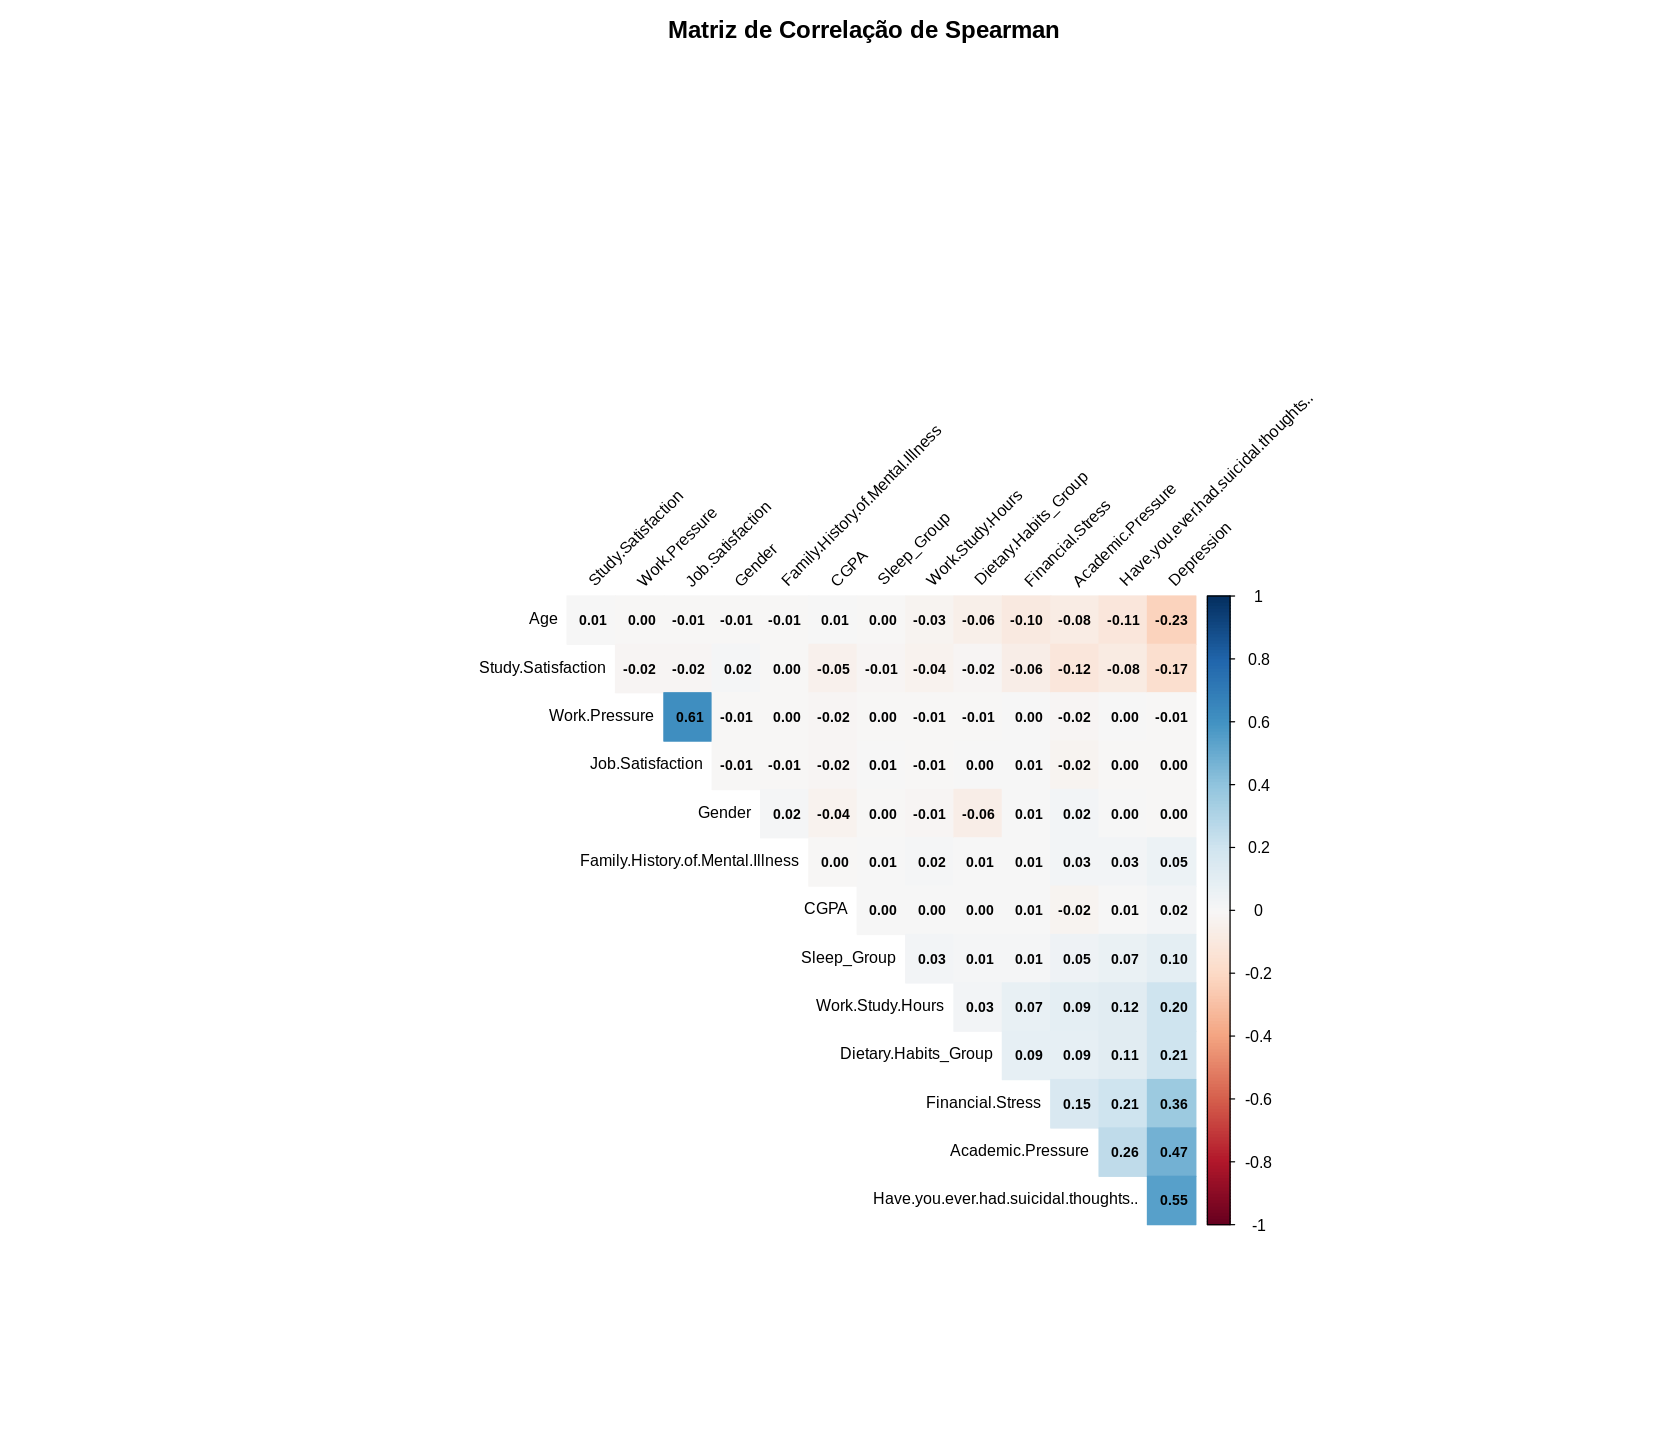

In [ ]:
# Carregar pacotes necessários
library(corrplot)
library(RColorBrewer)

# Configurar as dimensões do gráfico para ser maior
options(repr.plot.width = 14, repr.plot.height = 12)

# Calcular a matriz de correlação
df_cor <- cor(df[sapply(df, is.numeric)],
              method = "spearman",
              use = "pairwise.complete.obs")

# Criar um corrplot melhorado
corrplot(df_cor,
         method = "color",      # Método de visualização
         type = "upper",        # Mostrar apenas a parte superior
         order = "hclust",      # Ordenamento hierárquico
         tl.col = "black",      # Cor do texto dos rótulos
         tl.srt = 45,           # Rotacionar rótulos em 45 graus
         addCoef.col = "black", # Cor dos coeficientes
         number.cex = 0.7,      # Tamanho dos números
         tl.cex = 0.8,          # Tamanho dos rótulos
         col = colorRampPalette(c("#67001F", "#B2182B", "#D6604D",
                                 "#F4A582", "#FDDBC7", "#F7F7F7",
                                 "#D1E5F0", "#92C5DE", "#4393C3",
                                 "#2166AC", "#053061"))(200),
         diag = FALSE)          # Não mostrar a diagonal

# Adicionar título
title("Matriz de Correlação de Spearman", line = 2.5)

In [ ]:
install.packages("Metrics")

# Now, load the package
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Regressão Linear com variável mais correlacionada
# Assuming 'Academic.Pressure' is a suitable replacement based on your dataset
modelo_linear2 <- lm(CGPA ~ Academic.Pressure, data = df)

# Resumo do modelo
summary(modelo_linear2)

# Avaliar com métricas
pred2 <- predict(modelo_linear2, newdata = df)

library(Metrics)
mae2 <- mae(df$CGPA, pred2)
rmse2 <- rmse(df$CGPA, pred2)
r2_2 <- summary(modelo_linear2)$r.squared

cat("MAE:", mae2, "\nRMSE:", rmse2, "\nR²:", r2_2, "\n")

# Exportar esse modelo (opcional)
saveRDS(modelo_linear2, "modelo_regressao_linear_v2.rds")


Call:
lm(formula = CGPA ~ Academic.Pressure, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7308 -1.3521  0.1129  1.2742  2.3879 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.730794   0.021875 353.415  < 2e-16 ***
Academic.Pressure -0.023742   0.006374  -3.725 0.000196 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.47 on 27884 degrees of freedom
Multiple R-squared:  0.0004973,	Adjusted R-squared:  0.0004614 
F-statistic: 13.87 on 1 and 27884 DF,  p-value: 0.000196


MAE: 1.273038 
RMSE: 1.470321 
R²: 0.0004972547 


In [ ]:
# Modelo de Regressão Logística
modelo_logistico <- glm(Depression ~ Sleep_Group, data = df, family = binomial)

# Resumo do modelo
summary(modelo_logistico)

# Previsões (probabilidades)
probabilidades <- predict(modelo_logistico, type = "response")
classe_prevista <- ifelse(probabilidades > 0.5, 1, 0)

# Avaliação com matriz de confusão e acurácia
tabela_confusao <- table(Predito = classe_prevista, Real = df$Depression)
print(tabela_confusao)

acuracia <- sum(diag(tabela_confusao)) / sum(tabela_confusao)
cat("Acurácia:", acuracia, "\n")

# Exportar o modelo
saveRDS(modelo_logistico, file = "modelo_regressao_logistica.rds")



Call:
glm(formula = Depression ~ Sleep_Group, family = binomial, data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.30382    0.04105  -7.401 1.35e-13 ***
Sleep_Group  0.17922    0.01087  16.481  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37839  on 27885  degrees of freedom
Residual deviance: 37566  on 27884  degrees of freedom
AIC: 37570

Number of Fisher Scoring iterations: 4


       Real
Predito     0     1
      0     9     9
      1 11550 16318
Acurácia: 0.5854909 
